<a href="https://colab.research.google.com/github/mwithgod3952/TIL_update_new/blob/main/Marketing_Analytics_Cohort_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.megaemoji.com/images/posts/symbols_emojis_application_tips.jpg" width='80'/><font size = 2> <b><font color = 'grey'>"Installation1"</font>은 한글을 포함한 시각화 코드 실행을 위한 폰트설치 설치합니다.</b></font>

<font size = 2> <b><i>(적용을 위해, 설치 후 해당 코드파일을 재시작해야 합니다.)</i></b></font>




In [ ]:
#@title <font color = 'grey'><font size = 3><b>Installation1</b></font>

%%capture
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [33]:
#@title <font color = 'grey'><font size = 3><b>Libraries</b></font>
%%capture

!pip install -U kaleido
!pip install chart_studio
!pip install -U -q PyDrive
!pip install emoji --upgrade

# options
import emoji
from IPython import display

# file sharing
from google.colab import auth
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials

# analyzation
import os
import re
import ast
import sys
import csv
import copy
import time
import pickle
import random
import operator
import datetime
import numpy as np
import pandas as pd
from tqdm import tqdm
from numpy import asarray
from multiprocessing import Pool
from collections import namedtuple
from datetime import datetime, timedelta, date

from scipy.stats import t
import statsmodels.api as sm
from sklearn.cluster import KMeans
from scipy.spatial import distance
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D,axes3d
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# scrapping
import requests
from bs4 import BeautifulSoup

# visualization
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rc('font', family='NanumBarunGothic') 
%matplotlib inline
import seaborn as sns

import chart_studio
import chart_studio.plotly as py

import plotly.express as px
import plotly.graph_objects as go
from IPython.display import Image
from plotly.subplots import make_subplots

from google.colab import data_table

# options
pd.options.mode.chained_assignment = None
import warnings 
warnings.filterwarnings('ignore')

<font color = 'white'><font size = 50>.</font>

In [44]:
#@title <font color = 'grey'><font size = 3><b>Data preparation</b></font>

def data_prepa():
    global local_download_path, file_list
    from google.colab import drive; drive.mount('/content/drive', force_remount=True)

    print('\n\n\033[1m\033[94m---\033[0m\n');
    new_path = input('- 작업경로를 입력해주세요: '); print('\n')
    os.chdir(new_path)
    for step_i in tqdm(range(2)):
        if step_i == 0:
            print('\t\033[1mThe working path has been successfully changed\033[0m')  
        elif step_i == 1:
            if os.getcwd() == new_path:
                print(f'\t\033[1mMounted at{new_path}\033[0m\n')  
            else:
                print(f'\t\033[1mfailed mount\033[0m\n')  

    display.clear_output()
    print('\n\033[1m\033[94m---\033[0m\n');
    URL = input('- 공유받고자 하는 파일의 링크를 입력해주세요.: ')
    auth.authenticate_user()
    gauth = GoogleAuth()
    gauth.credentials = GoogleCredentials.get_application_default()
    drive = GoogleDrive(gauth)

    if '/folders/' in URL: 
        shared_drv_id = URL[URL.find('/folders/'):].split('/')[2].split('?')[0]
        Q = '- 저장하고자 하는 폴더의 이름을 입력해 주세요.: '
        folder_name = input(Q)
        local_download_path = f'{os.getcwd()}/{folder_name}'
        try:
            os.makedirs(local_download_path)
        except: print('e1'); pass;
        file_list = drive.ListFile(
            {'q': f"'{shared_drv_id}' in parents and trashed=false"}).GetList() 
        try:
            print('\n')
            if len(file_list) > 0: 
                for fi in tqdm(file_list):
                    drive.CreateFile({'id':fi['id']}).GetContentFile(f"{local_download_path}/{fi['title']}")
            import time; time.sleep(1)
            if len(os.listdir(local_download_path)) == len(file_list):
                print(emoji.emojize('\t\033[1mNew datasset has been created\033[0m :memo:'))
                time.sleep(1.5)
                display.clear_output()
                print('\t\033[1mThe file path is stored in variable \033[91mlocal_download_path\033[0m')
        except: print('e2'); pass;
    else:
        filename_extention = '.csv'
        shared_drv_id = URL[URL.find('/d/'):].split('/')[2]
        Q = '저장하고자 하는 파일의 이름을 입력해 주세요. (확장자명 제외): '
        filename = input(Q)
        drive.CreateFile({'id':shared_drv_id}).GetContentFile(f'{os.getcwd()}') 

        i = 0
        for fi in os.listdir():
            if filename in fi:
                i += 1 
        if i > 0:
            print('\n')
            print('*'*1)
            print('\t\033[1mNew data has been created\033[0m')
            print('\033[1m\033[0m')
            df = pd.read_csv(f'{filename}.csv').iloc[:, 1:]
            print('*'*2)
            print('\t\033[1mThe file is stored in variable df.\033[0m')    

<img src="https://i.pinimg.com/736x/80/0b/a2/800ba20898c79ee5d503306f4391395e.jpg" width='40'/><font size = 2> <b>input box로 요청드리는 본인의 <font color = 'slateblue'>"경로정보"</font>들 및 하단 셀에 기재해둔 <font color = 'slateblue'>"공유폴더 URL"</font>을 제시한 절차에 따라 입력-실행하면 데이터셋 다운로드가 진행됩니다.</b></font>

<img src="https://i.pinimg.com/736x/80/0b/a2/800ba20898c79ee5d503306f4391395e.jpg" width='40'/><font size = 2> <b>더불어, 데이터의 특성에 따라 기재되어있는 본 프로젝트 파일의 <u>전체 코드실행이 가능</u>해지며, <u>파일 복제에 한정하여 코드를 활용하셔도 무방</u>합니다.</b></font>

In [45]:
# 공유폴더 URL: https://drive.google.com/drive/folders/18aPJXG7CZKbCAo1Xl4JH45R2h6hx0u6m?usp=sharing
data_prepa()

	The file path is stored in variable local_download_path


<font color = 'white'><font size = 1>.</font>

# <font color = 'grey'><font size = 3><b>EDA 1</b></font>

In [ ]:
import multiprocessing as mp; print('\n\t - number of CPUs available', mp.cpu_count())


	 - number of CPUs available 8


In [ ]:
dataset = [x for x in os.listdir(local_download_path)]
print(dataset)

['data.csv', 'online_retail_final.csv']


In [ ]:
df1 = pd.read_csv(f'{wp}/{dataset[0]}', encoding= 'unicode_escape')
df1.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
col_names = df1.columns.tolist()
print(f"\n - {color.BOLD}Check the datatype of each column{color.END}")
for x in col_names: print(f"\t {color.RED}{color.BOLD}{x}: {df1[x].dtype}{color.END}") if (x.endswith('Date')) and (df1[x].dtype != '<M8[ns]') else print(f"{x}: {df1[x].dtype}") 


 - Check the datatype of each column
InvoiceNo: object
StockCode: object
Description: object
Quantity: int64
	 InvoiceDate: object
UnitPrice: float64
CustomerID: float64
Country: object


In [ ]:
def convert_to_dt(input_series, fm):
    '''
        fm: format
    '''
    return pd.to_datetime(input_series, format=fm)


df1['InvoiceDate'] = convert_to_dt(input_series=df1['InvoiceDate'], fm="%m/%d/%Y %H:%M")
T_mdy_hm = df1['InvoiceDate'].copy()
mdy_hm = []
for dt in ["%m/%d/%Y", "%H:%M"]:
    y = T_mdy_hm.apply(lambda x: x.strftime(dt))
    mdy_hm.append(y)
df1['Inv_date'] = convert_to_dt(mdy_hm[0], "%m/%d/%Y")

if df1.InvoiceDate.dtype == '<M8[ns]':
    print('T')
else:
    print('F')

T


In [ ]:
print(f'\t\n {color.BOLD}Shape : {df1.shape}{color.END} \n')

print(f'{color.BOLD}- NULL{color.END}')
print(df1.isnull().sum())
print('\n')

	
 Shape : (541909, 9) 

- NULL
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
Inv_date            0
dtype: int64




In [ ]:
df1[df1.Description.isnull()].iloc[:2, :]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_date
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom,2010-12-01
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom,2010-12-01


In [ ]:
des_nullDf = df1[df1.Description.isnull()].reset_index( drop=True )

In [ ]:
if len(des_nullDf) == des_nullDf.CustomerID.isnull().sum():
    print('T')
else:
    print('F')

T


In [ ]:
des_nullDf.UnitPrice.value_counts()

0.0    1454
Name: UnitPrice, dtype: int64

<font size = 2>상위의 과정을 통해 "Description" 열에 포함된 내용이 없을 때 "CustomerID" 정보 역시 누락되어 있음을 확인하였습니다, 더불어, "UnitPrice"는 0임을 확하였습니다.</font>

In [ ]:
des_notnullDf = df1[df1.Description.notnull()].reset_index( drop=True )
ID_NULL_cnt = des_notnullDf.CustomerID.isnull().sum()
print(f'\n\t {color.BOLD}- "Description"정보가 확인되나, ID 정보가 누락된 경우의 수 : {ID_NULL_cnt}{color.END}')


	 - "Description"정보가 확인되나, ID 정보가 누락된 경우의 수 : 133626


In [ ]:
df1 = df1[df1.Description.notnull() & df1.CustomerID.notnull()]
df1.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Inv_date       0
dtype: int64

In [ ]:
df1.loc[df1['InvoiceNo'].apply(lambda x: str('Y') if re.search('[a-zA-Z]+', x) else str('N')) == 'Y', 'InvoiceNo'].apply(lambda x: str(x)[0]).unique()

array(['C'], dtype=object)

In [ ]:
wC  = df1[df1['InvoiceNo'].apply(lambda x: x.startswith('C'))]
nwC = df1[df1['InvoiceNo'].apply(lambda x: True if len(set('AC') & set(x)) == 0 else False)]
if (len(wC) == sum(wC.Quantity < 0)) and (len(nwC) == sum(nwC.Quantity >= 0)):
    print('T')
else:
    print('N')    

T


<font size = 2>'InvoiceNO'정보 값 중 특정 값에 알파벳 값이 결합된 경우를 발견하여 확인해본 결과, 일반 정수값 번호 외에 'C'와 'A'가 결합된 경우를 확인하였습니다.</font>

<font size = 2>그 중, 'C'로 구분한 Quantity값이 모두 음수 인 것을 확인하였고 더불어, Quantity값이 음수이나 'InvoiceNO'값이 잘못 구분된 케이스 역시 없음으로, 취소된 주문건을 구분하기 위한 구분자임을 확신할 수 있습니다.</font>


<font size = 2>우선 'Cancelled'라는 열을 만들어 주문취소가 포함된 행을 1로 나머지 행을 0으로 구분합니다.</font>


In [ ]:
df1.loc[wC.index, 'Cancelled'] = int(1); df1.loc[df1.Cancelled.isnull(), 'Cancelled'] = int(0)

<font size = 2>아래부터는 주문건에 대한 정보만을을 취합하여 분석을 진행하겠습니다.</font>

In [ ]:
_df1 = df1[df1.Cancelled == 0]
_df1.Cancelled.value_counts()

0.0    397924
Name: Cancelled, dtype: int64

In [ ]:
_df1 = _df1[~ _df1['StockCode'].str.contains("^[a-zA-Z]")]
_df1.loc[:, 'Description'] = list(_df1.Description.str.lower())

In [ ]:
_df1 = _df1[_df1.UnitPrice > 0].reset_index(drop=True)

# <font size = 4>EDA 2</font>

<font color = 'crimson'><font size=1>***아래에 첨삭처리 된 부분은 데이터를 스크랩을 위한 코드입니다.***</font> 

> <font size = 2>해당 step의 최종 시각화인 plotly의 choropleth map은 **지역(location)구분을 위해 ISO 3166-1의 Alpha-3 code를 사용**합니다.</font>

> <font size = 2>List "contryTexcronym_"에 Alpha-3 code가 저장됩니다. 만약, 새롭게 크롤링 과정이 필요한 상황이라면, 아래 주석란의 생략처리 해제 후 스크랩을 실행하실 수 있습니다.</font>


In [ ]:
'''
    # data preparation step
    response = requests.get(url="https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3",)
    soup = BeautifulSoup(response.content, 'html.parser')

    contryTexcronym = soup.find_all("div", class_='plainlist')[0].find_all(class_="monospaced")
    contryTexcronym_ = [x.getText() for x in contryTexcronym]

    contryFullname = []
    for link in soup.find_all("div", class_='plainlist')[0].find_all("a"):
        try:
            contryFullname.append(link['title'])
        except:
            pass

    contryDF = pd.DataFrame( columns=['Texcronym', 'Fullname'])
    for col, val in zip(range(2), [contryTexcronym_, contryFullname]):
        contryDF.iloc[:, col] = val
'''
contryDF = pd.read_csv(f'{wp}/contry_code.csv').iloc[:, 1:] # contryDF.to_csv(f'{wp}/contry_code.csv')

In [ ]:
contryDF = contryDF.drop_duplicates([x for x in contryDF.columns if x.startswith('T') or x.startswith('F')],keep= 'last').reset_index(drop=True).copy()
_df1['Country_lower'] = _df1['Country'].str.lower(); contryDF['Country_lower'] = contryDF['Fullname'].str.lower()
F_columns = sum([_df1.columns.tolist(), [x for x in contryDF.columns if x.startswith('T')]], [])
_df1 = pd.merge(_df1, contryDF, on='Country_lower', how='left').loc[:, F_columns].copy()

In [ ]:
def style_negative(v, props=''):
    return (props if (type(v) == np.float) else None)

if _df1['Texcronym'].notnull().sum() !=  len(_df1):
    d1 = _df1[_df1['Texcronym'].isnull() ].sample(n = 1, random_state=int((2*10**3) + 1))
    d2 = _df1[_df1['Texcronym'].notnull()].sample(n = 1, random_state=int((2*10**3) + 2))
    _df1_sampled = pd.concat([d1, d2])
else:
    _df1_sampled = _df1.sample(n=2, random_state=int((2*10**3) + 3))

_df1_sampled.style.applymap(style_negative, props='color:crimson;background-color:lightgrey')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Inv_date,Cancelled,Country_lower,Texcronym
32657,540817,21755,love building block word,3,2011-01-11 12:56:00,5.950000,14209.000000,United Kingdom,2011-01-11 00:00:00,0.000000,united kingdom,nan
235017,566195,23236,storage tin vintage doily,6,2011-09-09 13:44:00,2.890000,12433.000000,Norway,2011-09-09 00:00:00,0.000000,norway,NOR


In [ ]:
print(f'\n\t {color.BOLD}{color.BLUE}- Countries that did not match: \n{color.END}')
for ci in _df1[_df1['Texcronym'].isnull()]['Country'].unique().tolist():
    print(f'\t\t {ci}')


	 - Countries that did not match: 

		 United Kingdom
		 EIRE
		 Channel Islands
		 United Arab Emirates
		 Saudi Arabia
		 Czech Republic
		 Unspecified
		 USA
		 European Community
		 RSA


In [ ]:
'''

    - 지역정보가 '지정되지 않음'을 의미하는 Unspecified와 유럽공동체를 의미하는 European Community는 제외합니다.
    - 영국, 아일랜드, 영국왕립예술협회를 나타내는 United Kingdom, EIRE, RSA은 GBR로 통합합니다.

        GBR : United Kingdom of Great Britain and Northern Ireland (영국)
        GBR : EIRE (아일랜드 공화국)
        FRA : Channel Islands (프랑스 북서 해안 인근)
        ARE : United Arab Emirates (아랍 에미리트 연합국)
        SAU : Saudi Arabia (사우디 아라비아)
        CZE : Czech Republic (체코)
        USA : United States of America (미국)
        GBR : United Kingdom of Great Britain and Northern Ireland (영국 왕립 예술 협회)

'''

c_dic = {
    'United Kingdom':'GBR',
    'EIRE':'GBR',
    'Channel Islands':'FRA',
    'United Arab Emirates':'ARE',
    'Saudi Arabia':'SAU',
    'Czech Republic':'CZE',
    'USA':'USA',
    'RSA':'GBR'    
};
for ci in c_dic.keys(): _df1.loc[_df1['Country'] == ci, 'Texcronym'] = c_dic[ci]

In [ ]:
c_dic_fv = [x for x in set(list(map(lambda x: str(x), _df1.loc[:, ['Texcronym', 'Country']].values.tolist()))) if 'nan' not in x]
c_dic_fv = copy.deepcopy(list(map(lambda x: ast.literal_eval(x), c_dic_fv)))

c_dic_fv_ = {}
for i in range(len(c_dic_fv)): c_dic_fv_[c_dic_fv[i][0]] = c_dic_fv[i][1]

active_stock = _df1.groupby('StockCode').Quantity.sum().sort_values(ascending=False).head(14).index
active_s_dfL = [_df1[_df1['StockCode'] == x] for x in active_stock]

sales_by_region = []; i = 0
for df_i in active_s_dfL:
    y = df_i.groupby('Texcronym').Quantity.sum()
    y = pd.DataFrame(y) 
    y = y.reset_index(drop=False)
    y['StockCode'] = active_stock[i]
    
    sales_by_region.append(y)
    i += 1

sales_by_regionDF = pd.concat(sales_by_region, axis=0).reset_index(drop=True).copy()
sales_by_regionDF['Country'] = sales_by_regionDF.loc[:, 'Texcronym'].apply(lambda x: c_dic_fv_[x])

sales_by_regionDF.head(2)

,Texcronym,Quantity,StockCode,Country
0,GBR,80995,23843,EIRE
1,AUS,193,23166,Australia


In [ ]:
fig = px.choropleth(sales_by_regionDF, locationmode='ISO-3', color='Quantity', facet_col='StockCode', facet_col_wrap=2,
                    facet_row_spacing=0.07, facet_col_spacing=0.01, width=800, 
                    locations='Texcronym', projection='natural earth', title='지역별 구매 선호도 현황'
                   )
fig.update_layout(
    autosize=False,
    margin = dict(
        l=30,
        r=30,
        t=100,
        pad=4,
        autoexpand=True
        ),
        height=1050,
        width=700,
    )
fig.show(renderer="colab")

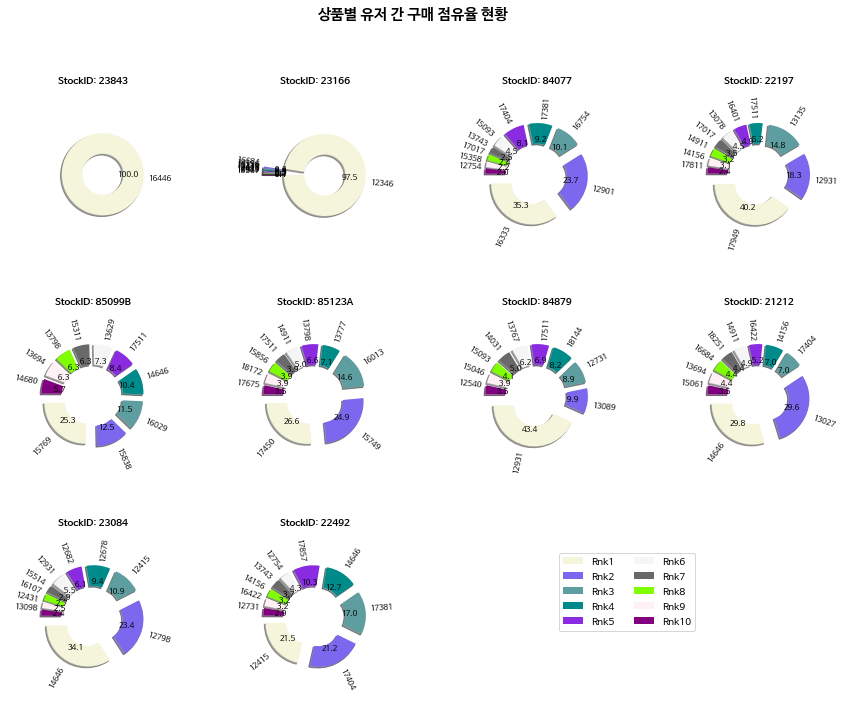

In [ ]:
active_stock = _df1.groupby('StockCode').Quantity.sum().sort_values(ascending=False).head(10).index
fig, axes = plt.subplots(3, 4, figsize=(15, 15), facecolor='#FFFFFF', sharex=True, sharey=True);
for axi in [2, 3]:
    fig.delaxes(ax= axes[2, axi])

'''
    * pon: pick_out_number
    * c_rank: 
'''

_, c_rank = zip(*matplotlib.colors.cnames.items())
pon = 10
max_id_len = max([len(_df1[_df1.StockCode == x].CustomerID.unique()) for x in active_stock])
if max_id_len > pon:
    top_n = 10
else:
    top_n = max_id_len

random.seed(2001); c_rank = random.sample(c_rank, top_n)
i = 0
for st_c in active_stock:
    sorted = _df1[_df1.StockCode == st_c].groupby('CustomerID').Quantity.sum() 
    if len(sorted) > top_n:
        n = top_n
    else:
        n = len(sorted)
        
    c_rankSUB = c_rank[ :n]
    ax  = axes[i // 4, i % 4]
    row = sorted.sort_values(ascending=False).head(n)
    ax.pie(
        row, labels = pd.Series(row.index).apply(lambda x: str(int(x))),
        colors=c_rankSUB,
        autopct = '%4.1f',
        textprops={'fontsize': 8}, 
        radius = .6, 
        startangle= 180, 
        wedgeprops=dict(width=.3),
        shadow = True,
        rotatelabels=True,
        explode = [np.float(0.15) for x in range(n)]
    )
    ax.set_title(f"StockID: {st_c}", fontweight='bold', fontsize=10)
    ax.set_ylabel("")

    legend = plt.legend([f'Rnk{x}' for x in range(1, 11)], 
                        bbox_to_anchor=(1.9, .9),
                        loc='upper left',  
                        ncol=2, 
                        prop={'size': 10},
                        fancybox=True)

    i += 1
fig.subplots_adjust(wspace=.3)   
title = fig.suptitle('상품별 유저 간 구매 점유율 현황', y=.95, fontweight='bold', fontsize=15)  
plt.subplots_adjust(bottom=0.3)

In [ ]:
Cu_Co_Dt_Q = _df1.groupby(['CustomerID', 'StockCode', 'Inv_date'])['Quantity'].sum().reset_index()
CodeUL = Cu_Co_Dt_Q.iloc[Cu_Co_Dt_Q.Quantity.sort_values(ascending=False).index].iloc[:, 0].tolist()

groupedby_Cu_Co_Dt = Cu_Co_Dt_Q.groupby(by='CustomerID')
Cu_Co_Dt_top10 = [groupedby_Cu_Co_Dt.get_group( CodeUL[x] ).sort_values(by='Inv_date', ascending=True).reset_index(drop=True) for x in range(10)]

In [ ]:
def style_negative1(v, props=''):
    return (props if (type(v) == type(pd.to_datetime('2020-10-25 02:00 +0200'))) or (type(v) == int) else None)

a_group, b_group = [], []
for i in range(10): a_group.append(i) if len(Cu_Co_Dt_top10[i]) == 1 else b_group.append(i)

print(f"\n{color.BOLD}: 특정 고객의 하루 거래량의 상위 0.002%(10 위권) 이내이면서, 해당 일 거래 건이 1개(더 이상 일어나지 않은 경우)인 경우{color.END}\n")
print(f"{color.BOLD}{color.DARKCYAN}'Rank' | 'CustomerID' | 'StockID' | 'Transaction date'{color.END}")
for top_singlei, rnk in zip(operator.itemgetter(*a_group)(Cu_Co_Dt_top10), a_group): print(f" {rnk+1},      {top_singlei.values[0][0]},       {top_singlei.values[0][1]},      {top_singlei.values[0][2].strftime('%d %B, %Y')}")


: 특정 고객의 하루 거래량의 상위 0.002%(10 위권) 이내이면서, 해당 일 거래 건이 1개(더 이상 일어나지 않은 경우)인 경우

'Rank' | 'CustomerID' | 'StockID' | 'Transaction date'
 2,      12346.0,       23166,      18 January, 2011
 4,      13135.0,       22197,      27 May, 2011
 5,      18087.0,       22053,      22 February, 2011


In [ ]:
username = 'junhee' ; api_key = 'Cp0vxoaPJAtEl5zOu9cQ'

def vis_customer_trading_quant(input_i=b_group[0], upload_code=0):

    # Step1
    y = Cu_Co_Dt_top10[input_i].copy(); y_origin = Cu_Co_Dt_Q.copy()

    Q1  = y_origin[y_origin.Quantity != 0].iloc[:, -1].quantile(.25)
    Q3  = y_origin[y_origin.Quantity != 0].iloc[:, -1].quantile(.75)
    IQR = Q3 - Q1

    Lower_fence = Q1-1.5*(IQR)
    Upper_fence = Q3+1.5*(IQR)

    def interquartile_range(x):
        if x > Upper_fence:
            y = float(0.5)
        elif (x >= Lower_fence) and (x < Q1):
            y = float(-0.25)
        elif (x >= Q1) and (x <= Q3):
            y = float(0.25)
        else:
            y = float(-0.5)
        return y

    y['interquartile_range'] = y.Quantity.apply(interquartile_range)
    y_Usc      = y.StockCode.unique().tolist()
    groupby_Sc = y.groupby(by='StockCode')
    
    # Step2
    resL = []
    for i in range(len(y_Usc)):
        n_suby     = groupby_Sc.get_group(y_Usc[i])
        time_rng = pd.date_range(start=min(y.Inv_date), end=max(y.Inv_date), freq='d').tolist()

        not_in_intersection = set(set(n_suby['Inv_date'])) ^ set(time_rng)
        def cr_missing_val(input_val, rep_num):
            return np.repeat(input_val, rep_num, axis=0)
        lst_of_tuples = list(zip(
            cr_missing_val(n_suby.iloc[0, 0], len(not_in_intersection)),
            cr_missing_val(n_suby.iloc[0, 1], len(not_in_intersection)),
            not_in_intersection,
            cr_missing_val(float(+0.0), len(not_in_intersection)),
            cr_missing_val(float(-0.5), len(not_in_intersection))
        ))
        y_ = pd.DataFrame(lst_of_tuples, columns=y.columns)
        res = pd.concat([n_suby, y_], axis=0).sort_values('Inv_date').reset_index(drop=True)
        resL.append(res)

    # Step3
    y_byCustomer = pd.concat(resL).reset_index(drop=True)
    y_byCustomer['x_steps'] = [1]*len(y_byCustomer)

    fig = px.bar(y_byCustomer, x="x_steps", y="StockCode", color='interquartile_range', orientation='h',
                hover_data=["Inv_date", "Quantity", "interquartile_range"],
                color_continuous_scale='jet',
                height=300, width =1200,
                title=''
                )

    Qs = y_byCustomer.iloc[:, -3]; 
    def get_ypos_Topval():
        return np.where(y_byCustomer.StockCode.unique() == y_byCustomer[Qs == max(Qs)].StockCode.values[0])[0][0]
    def draw_circle_Topval(inputX, inputY):
        if len(y_byCustomer) > 1:
            vis_acc = True
            fig.add_shape(type="circle", 
                        xref="x", yref="y", x0=inputX-2, y0=inputY-1, x1=inputX+3, y1=inputY+1,
                        line=dict(
                            color="lime",
                            width=5,
                            dash="dot",
                            )
                        )
        else:
            vis_acc = False

    Q_Maxdt = y_byCustomer[Qs == max(Qs)]['Inv_date']
    if len(Q_Maxdt) == 1:
        Q_interval_to_max = int((max(Q_Maxdt) - min(y_byCustomer['Inv_date'])).days); 
        y_position = get_ypos_Topval();
        draw_circle_Topval(inputX=Q_interval_to_max, inputY=y_position)
    else:
        for param_n in  [min(Q_Maxdt), max(Q_Maxdt)]:
            Q_interval_to_max = int((param_n - min(y_byCustomer['Inv_date'])).days)
            y_position = get_ypos_Topval()
            draw_circle_Topval(inputX=Q_interval_to_max, inputY=y_position)

    x_labels = [x.strftime('%Y-%m-%d') for x in time_rng]
    if len(x_labels) > 9:
        indL = list(range(len(x_labels)))
        a, c = 0, int(len(x_labels) - 1)
        b = int(pd.Series(indL).median(skipna = True))
        x_labels_ = ['']*len(x_labels)
        for dt_i in [a, b, c]:
            x_labels_[dt_i] = x_labels[dt_i]
        x_labels = copy.deepcopy(x_labels_)    
    fig.update_xaxes(
        tickvals=np.arange(len(x_labels)), ticktext=x_labels,
        tickfont_size=9, ticks="outside", ticklen=1, tickwidth=1, tickangle=45
        )
    fig.update_yaxes(tickfont_size=9, ticks="outside", ticklen=1, tickwidth=1)

    if len(Q_Maxdt) == 1:
        sub_title = f"<b>Customer_ID: {int(y_byCustomer.iloc[0, 0])}</b>, <i>Trade quantity: {int(max(Qs))}, Date: {max(y_byCustomer[Qs == max(Qs)].iloc[:, 2]).strftime('%d %B, %Y')}</i>"
    else:
        multi_dt=[x.strftime('%d %B, %Y') for x in y_byCustomer[Qs == max(Qs)].iloc[:, 2].reset_index(drop=True)]
        sub_title=f"<b>Customer_ID: {int(y_byCustomer.iloc[0, 0])}</b>, <i>Trade quantity: {int(max(Qs))}, Date: {multi_dt[0]} and {multi_dt[1]}</i>"
    fig.update_layout(
        title=sub_title, 
        xaxis=dict(
            rangeslider=dict(
                autorange=True,
                range=[x_labels[0], x_labels[-1]],
                visible=True),
                type="linear"
                ),
                
        font=dict(
            family="Courier New, monospace",
            size=9,
            color="gray"),
        width=1200,
        )
    
    chart_studio.tools.set_credentials_file(username=username, api_key=api_key)
    py.plot(fig, filename = f'payment_trend{upload_code}', auto_open=False)

    img_bytes = fig.to_image(format="png")
    return Image(img_bytes)

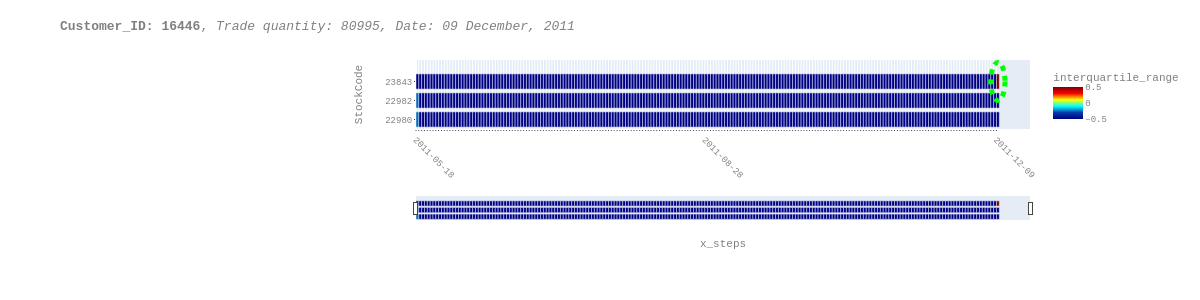

In [ ]:
vis_customer_trading_quant(input_i=b_group[0], upload_code=0)

* <font size = 2>내용: 전체 거래량의 약 1.57%의 점유율로 가장 많은 거래를 채결한 유저(코드-16446)의 거래동향</font> 
* <font size = 2>Link (Interactive chart) :</font> 
> <font size=2>https://chart-studio.plotly.com/create/?fid=junhee:35</font>



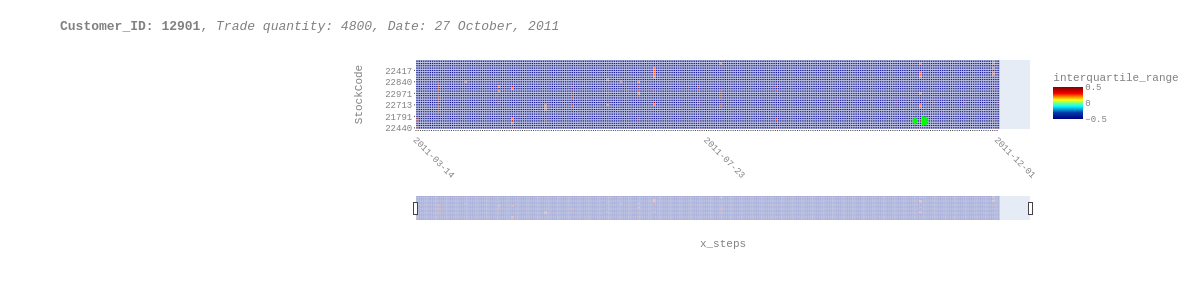

In [ ]:
vis_customer_trading_quant(input_i=b_group[1], upload_code=1)

* <font size = 2>내용: 전체 거래량의 약 0.09%의 점유율로 세 번째로 많은 거래를 채결한 유저코드 12991 고객의 거래동향</font> 
* <font size = 2>Link (Interactive chart) :</font>
> <font size=2>https://chart-studio.plotly.com/create/?fid=junhee:37</font>

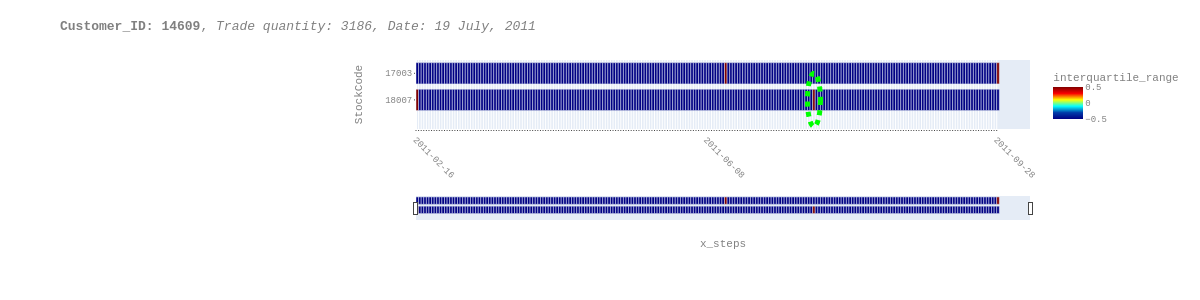

In [ ]:
vis_customer_trading_quant(input_i=b_group[2], upload_code=2)

* <font size = 2>내용: 전체 거래량의 약 0.06%의 점유율로 여섯번째로 많은 거래를 채결한 유저코드 14509 고객의 거래동향</font> 
* <font size = 2>Link (Interactive chart) :</font>
> <font size=2>https://chart-studio.plotly.com/create/?fid=junhee:39</font>


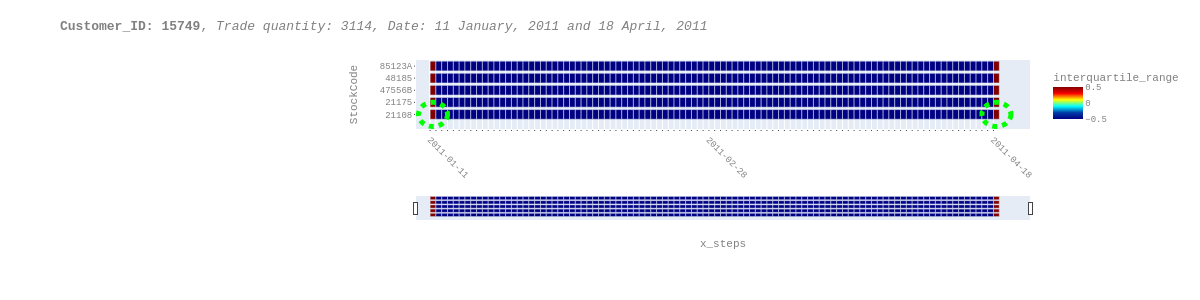

In [ ]:
vis_customer_trading_quant(input_i=b_group[3], upload_code=3)

* <font size = 2>내용: 전체 거래량의 약 0.0604% 점유율로 일곱, 여덟번째로 많은 거래를 채결한 유저코드 15749 고객의 거래동향</font> 
* <font size = 2>Link (Interactive chart) :</font>
> <font size=2>https://chart-studio.plotly.com/create/?fid=junhee:49</font>

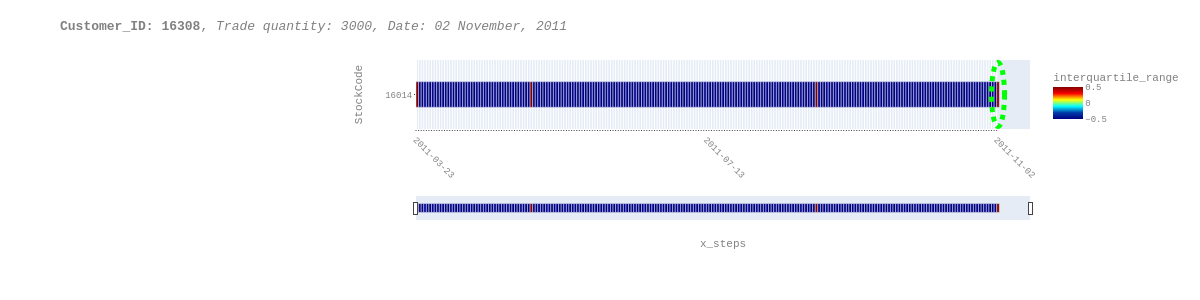

In [ ]:
vis_customer_trading_quant(input_i=b_group[5], upload_code=5)

* <font size = 2>내용: 전체 거래량의 약 0.05% 점유율로 일곱, 여덟번째로 많은 거래를 채결한 유저코드 16308 고객의 거래동향</font> 
* <font size = 2>Link (Interactive chart) :</font>
> <font size=2>https://chart-studio.plotly.com/create/?fid=junhee:45</font>

<font size = 2></font>

<font size = 2>___</font>

## <font size = 3>Cohort analysis</font>

### <font size = 3>Cohort analysis_ 1. Retention rate</font>

<!DOCTYPE html>
<html>

<head>
    <meta charset="utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
</head>

<body>
    <img src="https://count.ly/images/content/what-is-customer-retention/retention-calculation-formula.png">
</body>

</html>



In [ ]:
_df1['get_YearMonth'] = _df1['InvoiceDate'].apply(lambda x: datetime.datetime(x.year, x.month, 1))
_df1['dt_Firstpurchase'] = _df1.groupby('CustomerID')['get_YearMonth'].transform('min')

_df1.loc[:, ['get_YearMonth', 'dt_Firstpurchase']].head(2)

,get_YearMonth,dt_Firstpurchase
0,2010-12-01,2010-12-01
1,2010-12-01,2010-12-01


In [ ]:
cohort_TargetcolL = ['get_YearMonth', 'dt_Firstpurchase']
_df1['Y'], _df1['M'], _df1['D1'] = pd.DatetimeIndex(_df1[cohort_TargetcolL[0]]).year, pd.DatetimeIndex(_df1[cohort_TargetcolL[0]]).month, pd.DatetimeIndex(_df1[cohort_TargetcolL[0]]).day
_df1['F_purche_Y'], _df1['F_purche_M'], _df1['F_purche_D1'] = pd.DatetimeIndex(_df1[cohort_TargetcolL[1]]).year, pd.DatetimeIndex(_df1[cohort_TargetcolL[1]]).month, pd.DatetimeIndex(_df1[cohort_TargetcolL[1]]).day

_df1.iloc[:, -7:].head(2)

,dt_Firstpurchase,Y,M,D1,F_purche_Y,F_purche_M,F_purche_D1
0,2010-12-01,2010,12,1,2010,12,1
1,2010-12-01,2010,12,1,2010,12,1


In [ ]:
Y_interval = _df1['Y'] - _df1['F_purche_Y']
M_interval = _df1['M'] - _df1['F_purche_M']

_df1['cohort_M_period'] = 12*Y_interval+M_interval+1

cohort_df = _df1.groupby(['cohort_M_period', 'dt_Firstpurchase'])['CustomerID'].nunique().reset_index()
cohort_df.head(2)

,cohort_M_period,dt_Firstpurchase,CustomerID
0,1,2010-12-01,884
1,1,2011-01-01,416


In [ ]:
cohort_pivot = cohort_df.pivot(index='dt_Firstpurchase', columns='cohort_M_period', values='CustomerID')
cohort_Retentionrt = cohort_pivot.divide(cohort_pivot.iloc[:, 0], axis=0)
cohort_Retentionrt = cohort_Retentionrt.set_index(cohort_Retentionrt.index.strftime("%Y-%m"))

data_table.DataTable(cohort_Retentionrt.applymap(lambda x: str(round(x*100, 2))+'%' if pd.notnull(x) else ''), include_index=True, num_rows_per_page=13)

cohort_M_period,1,2,3,4,5,6,7,8,9,10,11,12,13
dt_Firstpurchase,,,,,,,,,,,,,
2010-12,100.0%,36.54%,32.35%,38.35%,36.2%,39.82%,36.2%,34.84%,35.29%,39.48%,37.33%,50.23%,26.47%
2011-01,100.0%,21.88%,26.68%,22.84%,31.73%,28.85%,24.76%,24.04%,29.57%,32.69%,36.54%,11.78%,
2011-02,100.0%,18.68%,18.68%,28.68%,27.11%,24.47%,25.53%,27.37%,24.74%,30.53%,6.84%,,
2011-03,100.0%,14.82%,25.22%,19.91%,22.35%,16.81%,26.77%,23.01%,27.88%,8.63%,,,
2011-04,100.0%,21.0%,20.33%,21.0%,19.67%,22.67%,21.67%,26.0%,7.33%,,,,
2011-05,100.0%,19.01%,17.25%,17.25%,20.77%,23.24%,26.41%,9.51%,,,,,
2011-06,100.0%,17.36%,15.7%,26.45%,23.14%,33.06%,9.5%,,,,,,
2011-07,100.0%,17.65%,20.32%,22.46%,27.27%,11.23%,,,,,,,
2011-08,100.0%,20.12%,24.26%,24.26%,12.43%,,,,,,,,


In [ ]:
def comp_2_grp(y2, y1, X, y2lab, y1lab, tlt, dtick2, dtick1, annot_inter_x2, annot_inter_x1):
    fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                        shared_yaxes=False, vertical_spacing=0.001)

    fig.append_trace(go.Bar(
        x=y2,
        y=X,
        marker=dict(
            color='rgba(50, 171, 96, 0.6)',
            line=dict(
                color='rgba(50, 171, 96, 0.6)',
                width=1
            )
        ),
        name=y2lab,
        orientation='h'
    ), 1, 1)

    fig.append_trace(go.Scatter(
        x=y1,
        y=X,
        mode='lines+markers',
        line_color='rgb(128, 0, 128)',
        name=y1lab
    ), 1, 2)

    fig.update_layout(
        title=tlt,
        yaxis=dict(
            showgrid=False,
            showline=False,
            showticklabels=True,
            domain=[0, 0.85],
        ),
        yaxis2=dict(
            showgrid=False,
            showline=True,
            showticklabels=False,
            linecolor='rgba(102, 102, 102, 0.8)',
            linewidth=2,
            domain=[0, 0.85],
        ),
        xaxis=dict(
            zeroline=False,
            showline=False,
            showticklabels=True,
            showgrid=True,
            domain=[0, 0.42],
            dtick=dtick2
        ),
        xaxis2=dict(
            zeroline=False,
            showline=False,
            showticklabels=True,
            showgrid=True,
            domain=[0.47, 1],
            side='top',
            dtick=dtick2,
        ),
        legend=dict(x=0.029, y=1.038, font_size=10),
        margin=dict(l=100, r=20, t=70, b=70),
        paper_bgcolor='rgb(255, 255, 255)',
        plot_bgcolor='rgb(255, 255, 255)',
        height=500,
        width=1200,
    )
    annot = []
    y1_percent = list(map(lambda x: int(x*100), y1st))
    for y1_i, y1p_i, y2_i, xi in zip(y1, y1_percent, y2, X):
        annot.append(dict(
            xref='x2', yref='y2',
            x=y1_i+annot_inter_x2, y=xi+0.25,
            text='{:}%'.format(y1p_i), textangle=-7,
            font=dict(family='Arial', size=12, color='rgb(128, 0, 128)'),                
            showarrow=False)
        )
        annot.append(dict(
            xref='x1', yref='y1',
            x=y2_i+annot_inter_x1, y=xi+0.25,
            text=str(y2_i), textangle=-7,
            font=dict(family='Arial', size=12, color='rgb(50, 171, 96)'),                
            showarrow=False)
        )

    fig.update_layout(annotations=annot) 
    return fig.show(renderer="colab")

In [ ]:
'''
    rep_pb: repeated purchasing behavior
        * rep_pb_cumsum_sorted: 각 코호트 그룹 별 거래(신규거래) 발생에 대한 누적현황 계산합니다.
        * rep_pb_in_month: 각 시간경과(13 단계) 별 거래현황을 계산합니다. 
'''
 
rep_pb_cumsum_sorted = _df1.groupby('dt_Firstpurchase')['CustomerID'].nunique().cumsum().reset_index().sort_values(by='CustomerID', ascending=False).set_index('dt_Firstpurchase')
rep_pb_in_month = _df1.groupby('cohort_M_period')['CustomerID'].nunique().reset_index()

x    = rep_pb_in_month['cohort_M_period'].values
y1st = list(rep_pb_in_month['CustomerID'] / rep_pb_cumsum_sorted.reset_index()['CustomerID']) # 전체 유저를 대상으로 월 기준 유지율(retention rates)
y2nd = cohort_df[cohort_df['cohort_M_period'] == 1].loc[:, 'CustomerID'].tolist()

In [ ]:
comp_2_grp(y2=y2nd, y1=y1st, X=x, y2lab='new transaction', y1lab='retention rate', tlt='최초 거래발생일 기준 코호트(Cohort) 집단 별 신규거래 변화 및 전체고객 거래 유지율에 대한 추이', dtick2=100, dtick1=0.1, annot_inter_x2=0.07, annot_inter_x1=0)

In [ ]:
_df1['TotalPrice'] = _df1['UnitPrice'] * _df1['Quantity']
Monthly_consumption = _df1.groupby("get_YearMonth").agg({"TotalPrice": "sum",
                                                         "CustomerID": "nunique"})
Monthly_consumption['Index'] = range(1, len(Monthly_consumption)+1)

y2, y1, x = zip(*Monthly_consumption.values)
x = pd.Series(x).apply(lambda x: int(x))

In [ ]:
comp_2_grp(y2, y1, X=x, y2lab='consumption', y1lab='trading inquiry', tlt='2010년 12월 ~ 2011년 12월 사이 월별 거래현황 및 소비량에 대한 추이', dtick2=10 ** 5, dtick1=2*(10 ** 2), annot_inter_x2=10 ** 2, annot_inter_x1=5*(10 ** 4))

## <font size = 3>RFM analysis</font>

<!DOCTYPE html>
<html>

<head>
    <meta charset="utf-8" />
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width, initial-scale=1">
</head>

<body>
    <img src="https://sarahtianhua.files.wordpress.com/2015/09/rfm-300x278.png">
</body>

</html>


<font size = 2>‘기업’은 운영과 성장을 위해 평가 기반의 경영이 필수시 됩니다. 더불어, 체계적인 관리를 위해 대표적으로는 R.O.I(Return On Investment)에 기준하여 운영에 따른 성과를 책정합니다. R.O.I는 투자액에 대한 이익률을 나타내는 지표로 아래와 같은 방법으로 계산할 수 있습니다..</font>

<font size = 2>
\begin{align}
        R.O.I = \frac{Return - Investment}{Investment}
    \end{align}
</font>

<font size = 2>“e-commerce market”의 수익구조는 경영전략, 콘텐츠 생산력에 따라 다양해질 수 있다고 생각합니다. 그러나, 본질적으로는 마켓을 반복적으로 이용코자 하는 충성고객 유치만큼 중요한 것이 있을까요?</font>

<font size = 2>‘R.F.M’은 Recency + Frequency + Monetary의 약자로 고객관리를 목적으로 고객을 그룹화(Categorization)하는 방법론입니다. 고객의 그룹화를 위해 최근까지 높은 빈도로 고액의 소비성향을 보일수록 ‘로열그룹'으로 구분짓습니다.</font>

<font size = 2>**RFM은 기본적으로 Quantile system을 사용합니다. 이는 데이터를 분할하고자 하는 특정 지표의 점수에 따라 데이터를 분할함을 의미합니다.**</font>

<font size = 2>- RFM에서는 R, F, M 각각을 4분위수로 5분할 하여 1점부터 5점까지로 점수를 할당하고 최종적으로는 점수를 통합히여 고객을 분류합니다.</font>

<font size = 2>전통적으로는 11 그룹으로 분류 가능하며 각 그룹은 아래와 같이 의미를 부여할 수 있습니다.</font>

> <font size = 2>Champions: 구매활동이 최근까지 있었고, 구매주기가 빠르며, 구매액 역시 큰 최상의 고객층입니다.</font>

> <font size = 2>Loyal Customers: 구매액은 높은편에 속하지만 구매주기가 다소 느린 경향을 보입니다.</font>

> <font size = 2>Potential Loyalist: 새롭게 유입된 고객 중 평균보다 높은 수준의 구매활동을 보이며 한번 이상의 반복구매를 이룬 경험이 있습니다.</font>

> <font size = 2>Recent Customers: 가장 최근에 구매를 이루긴 했지만, 구매에 있어 주기성을 띄진 못합니다.</font>

> <font size = 2>Promising: 첫 구매 이후로 구매활동이 현저히 드문 고객층입니다.</font>

<font size = 2>- 아래의 6개 그룹은 Naughty SIX로 불리는 추가 그룹입니다. 바교적 R, F, M 점수가 현저히 떨어지지만 우수고객으로서의 잠재력이 높은 그룹을 아래와 같이 분류할 수 있습니다.</font>

> <font size = 2>Customers Needing Attention: F, M 점수는 평균 이상인 반면, R 점수가 평균 이하인 경우의 고객층입니다.</font>

> <font size = 2>About To Sleep: R, F, M 모두가 평균 이하인 경우로 곧 주요고객으로서 제외될 수 있는 고객층입니다.</font>

> <font size = 2>At Risk: F, M 점수가 과거에 높았던 그룹으로 Lost 그룹과 유사하다고 볼 수 있는 고객층입니다.</font>

> <font size = 2>Can’t Lose Them : At Risk의 유사 그룹이나 상대적으로 3항목의 점수가 낮은 그룹의 고객층입니다.</font>

> <font size = 2>Hibernating: 본사의 서비스 접근이 오래전 끊긴 고객층입니다. 아주 드물게 소비하는 고객층입니다.</font>

> <font size = 2>Lost: R, F, M 점수가 최 하위권인 고객층입니다.</font>

---

### <font size = 3>Logical background</font>

<font size=2>**본 분석과정에서 RFM 분석을 선택하게 된 분석경과는 아래와 같습니다.**</font>

<font color = 'white'><font size=2>-</font>

<font size=2>1. 우리는 통상 특정 제품을 평가할 때에 "가성비"에 대해 고민하게 됩니다. 내가 산 이 제품을 적정 가격에 구매한 것인지.. 더불어, 막상 저렴한 가격으로 제품을 구매했다 하더라도 제품의 품질이 낮은 경우 재구매로 이어지지 않는 경우가 일반적입니다.</font>

<font size=2>2. 제품의 가격변동이 유동적 상품이라면, 통상 '다량구매'를 '정기구매'보다도 선호하는 경우가 일반적입니다.</font> 

<font color = 'crimson'><font size=1>***(이는 구매자의 '소득수준' 및 '소비성향'에 의해 변동될 수 있습니다. 이를 '성별', '연령', '직업', '구매상품의 가격대' 등의 데이터로 예측모델을 제작을 시도해볼 수 있겠으나 본 리포트는 해당 데이터 부재로 생략합니다.)***</font>

<font color = 'white'><font size=2>-</font>

<font size = 2>**위와 같은 가설에 기반하여 아래의 분석에서 'unit price(상품의 단가)'와 'quantity(상품별 판매량)' 간의 '관계성'을 1규명, 2분석합니다.**</font>

#### <font size = 3>1. Correlation Verifying (상관관계 규명)</font>

<font size = 2>- Regression</font>

> <font size = 2>'unit price'와 'quantity'간의 관계성을 규명하려는 목적으로 '회귀분석'을 진행합니다. 본 분석의 목적은 가격이 저렴할수록 적정량 구입을 주기적으로 진행하는지 여부를 규명하는 것입니다.</font>

<font color = 'crimson'><font size=1>***(분석 방법과 관련하여 유념할만한 특이사항은 아래와 같습니다.)***</font>


> <font size = 2>'unit price'와 'quantity'을 그룹화 하여 각 건의 빈도를 '응답변수'로 설정하였습니다.</font>

> <font size = 2>더불어, 'unit price'의 경우 [0-1] 사이의 값으로 scaling(정규화)하고, 이를 X일 때 Y (Y=1-X)값을 'unit price'값으로 설정하였습니다. 이는 분석의 목적(가격에 따른 주기적 구매여부 규명)을 위한 것입니다.</font>

In [ ]:
grped_Pr_Qu   = _df1.groupby(['UnitPrice', 'Quantity'])['CustomerID'].sum()
grped_Pr_Qu_  = grped_Pr_Qu.reset_index()

grped_Pr_Qu__ = pd.DataFrame( columns=['x1', 'x2', 'y'])
scaler = MinMaxScaler()
grped_Pr_Qu__.iloc[:, 0], grped_Pr_Qu__.iloc[:, 1], grped_Pr_Qu__.iloc[:, 2] = zip(*scaler.fit_transform(grped_Pr_Qu_.values))
grped_Pr_Qu__ = grped_Pr_Qu__[(grped_Pr_Qu__ == 0).any(axis=1) == False].reset_index(drop=True).copy()
grped_Pr_Qu__['x1'] = 1-grped_Pr_Qu__['x1']

X, y = grped_Pr_Qu__.iloc[:, :2].values, grped_Pr_Qu__.iloc[:, 2].values

if len(X) == len(y):
    n = len(y)
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X, y)
beta_hat = [reg.intercept_] + reg.coef_.tolist()

X1 = np.column_stack((np.ones(n), X))
sigma_hat = np.sqrt(np.sum(np.square(y - X1@beta_hat)) / (n - X1.shape[1]))
beta_cov = np.linalg.inv(X1.T@X1)
t_vals = beta_hat / (sigma_hat * np.sqrt(np.diagonal(beta_cov)))
p_vals = t.sf(np.abs(t_vals), n-X1.shape[1])*2 

In [ ]:
Eval_RegressionModel = pd.DataFrame([t_vals, p_vals], 
                                    columns=['unit price (predictor variable 1)', 'quantity (predictor variable 2)', 'trading inquiry (response variable)'],
                                    index=['T-value', 'P-value'])

data_table.DataTable(Eval_RegressionModel, include_index=True, num_rows_per_page=2)

,unit price (predictor variable 1),quantity (predictor variable 2),trading inquiry (response variable)
T-value,-0.946137,1.161594,-1.134116
P-value,0.344139,0.245474,0.256818


<font color = 'crimson'><font size=1>***T, P Value에 대한 원리를 아래의 링크에 문서로 작성해두었습니다. 분석된 수치에 대해 보다 구체적인 해석과 증명에 관련된 내용을 확인해 보실 수 있습니다.***</font>

<font color = 'white'><font size=2>-</font>

<font color = 'blue'><font size = 2>**분석결과 :**</font>

<font size = 2>**"가격이 저렴할수록 적정량 구입을 주기적으로 진행할 것이다."** 에 대한 회귀계수 유의성 검정(단측검정)에 대해, 유의수준 0.05(5%)에 대한 각 유의 확률 (-1.1341156342551404, 0.2568180208905173) 모두 통계적으로 유의하지 않음으로 귀무가설을 기각할 수 없습니다.</font>

<font size = 2>**"즉, 낮은 단가가 주기적 구매양상에 간접적 영향을 미친다고 볼 수 없다"** 라고 해석할 수 있습니다.</font>

<font color = 'blue'><font size = 2>**분석방향 :**</font>

<font size = 2>**우리의 가설은 거짓임으로, 단가가 높음과 상관없이 대량구매가 이뤄질 수 있음도 추정범위에 해당합니다.**</font>

<font size = 2>위와 같은 분석결과를 근거로, 저는 **Customer Segmentation**을 위해, R.F.M 분석의 **M**onetary 값을 설정할 때에 단지 전통적인 방법을 따라 **Total Price {= (Unit Price) x (Quantity)}**를 무조건적으로 활용할 것이 아닌 **Unit Price, Quantity 각각의 값을 세분화 한채로 Customer Segmentation을 수행할 필요를 주장합니다.**</font>

---

#### <font size = 3>2. Change Pattern Analysis</font>

<font size = 2>위 과정에서 주장했던 바를 내포하며 **Customer Segmentation**을 본격적으로 수행하기에 앞서, **Unit Price**, **Quantity**, **Total Price**의 **시간적 변화에 따른 값의 변화 경향** (Trend)를 **분석**, **예측**해봅니다.</font>

<font size = 2>먼저, **상품** (StockCode)에 기준하여 전체 데이터셋을 그룹화 하였습니다. 이 후, 각 데이터셋들의 **표준편차의 평균($\\E({S})$)**보다 ${S}$가 큰 **표본** (Sample)만을 선별하여 시계열 그래프로 시각화 하였습니다.</font>

<font color = 'crimson'><font size=1>***(위의 과정은, 의미적으로 '분산'(편차의 평균)보다 큰 편차를 가진 값들을 선별한 것과 같습니다. 해당 이론에 대한 자세한 자료가 필요하시다면, 다음의 정리문서가 도움이 될 것입니다. https://docs.google.com/document/d/1CQYD6uHHizdy0iAXMeQI7rL2WzbaAA2htFThV1mSJog/edit?usp=sharing)***</font>


In [ ]:
price_nunq  = _df1.groupby('StockCode').UnitPrice.nunique()
over3_codes = list(set(price_nunq[price_nunq >= 3].index))
indexes = list(map(lambda x: np.where(_df1.reset_index(drop=True).StockCode == x)[0].tolist(), over3_codes)); m_indexes = sum(indexes, [])
indexes.sort()

over3_df = _df1.reset_index(drop=True).iloc[m_indexes].reset_index(drop=True)
over3_df.loc[:, 'InvoiceDate'] = over3_df.InvoiceDate.apply(lambda x: pd.to_datetime(x))
over3_dfFv = over3_df.loc[:, ['InvoiceDate', 'StockCode',	'Quantity',	'UnitPrice', 'TotalPrice']].copy()

# visualization
_, c_items = zip(*matplotlib.colors.cnames.items())
random.seed(2022)
c_items = [random.choice(c_items) for x in range(len(over3_dfFv.StockCode.unique()))]

def dispersion_calculation_OfRank(T_col):
    y = np.mean(over3_dfFv.groupby(['StockCode'])[T_col].apply(lambda x: np.var(x)).sort_values(ascending=False))
    return y

def ts_vis(target_col='UnitPrice'):
    var_avg = dispersion_calculation_OfRank(target_col)
    
    fig  = plt.figure( figsize=(16, 6) )
    axes = [plt.subplot2grid((1, 3), (0, 0), colspan=2), plt.subplot2grid((1, 3), (0, 2))]
    i = 0
    for key, gr in over3_dfFv.groupby(by='StockCode'):
        if np.var(gr[target_col]) > var_avg:
            lab = key
        else:
            lab = None
        axes[0].bar(gr.InvoiceDate, gr[target_col], color=c_items[i], label=lab, alpha=0.4)
        i += 1

    axes[0].legend(loc='upper left')
    axes[0].set_title(f'{target_col}의 변화 및 StockCode별 표준편차가 이의 평균을 넘어서는 상품을 분류')
    axes[0].set_xlabel('TIme')
    axes[0].set_ylim(0, round(np.max(over3_dfFv[target_col])) * 1.25)
    axes[0].set_ylabel(target_col)

    axes[1].boxplot(over3_dfFv[target_col])
    axes[1].set_title(f"Boxplot for {target_col}")
    
    for j in range(2):
        axes[j].grid()
        for label in axes[j].get_xticklabels(which='major'):
            label.set(rotation=45, horizontalalignment='right')

    fig.tight_layout()

    return plt.show()    

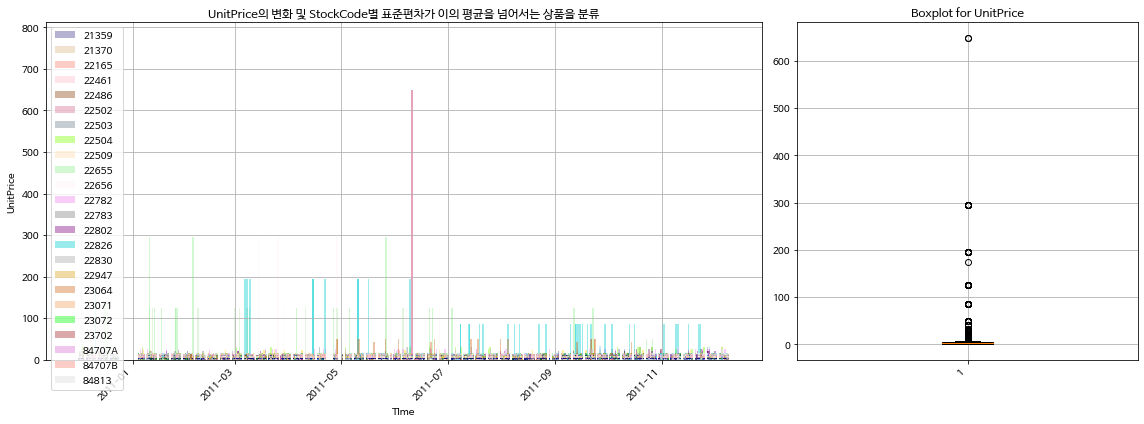

In [ ]:
print('\n')
ts_vis(target_col='UnitPrice')

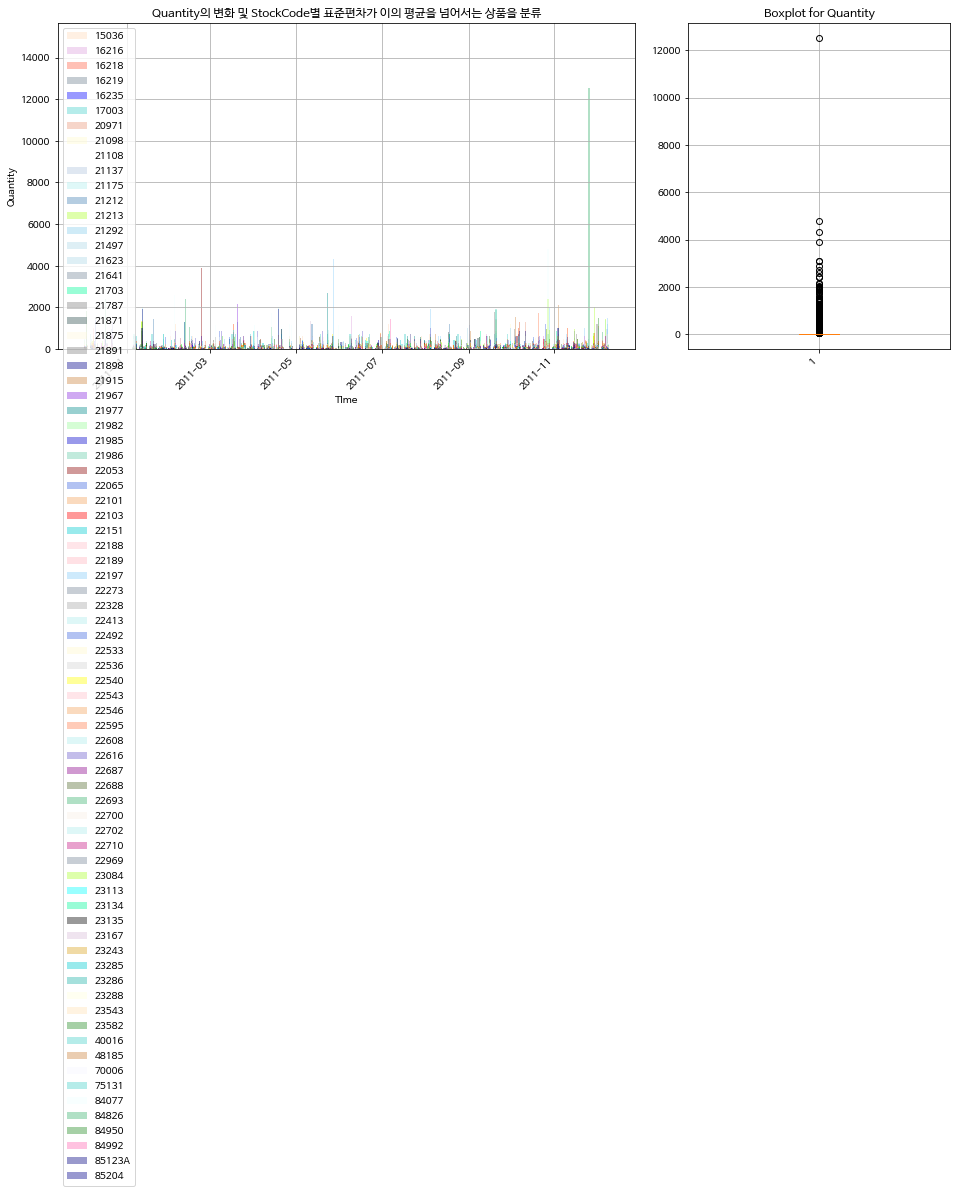

In [ ]:
print('\n')
ts_vis(target_col='Quantity')

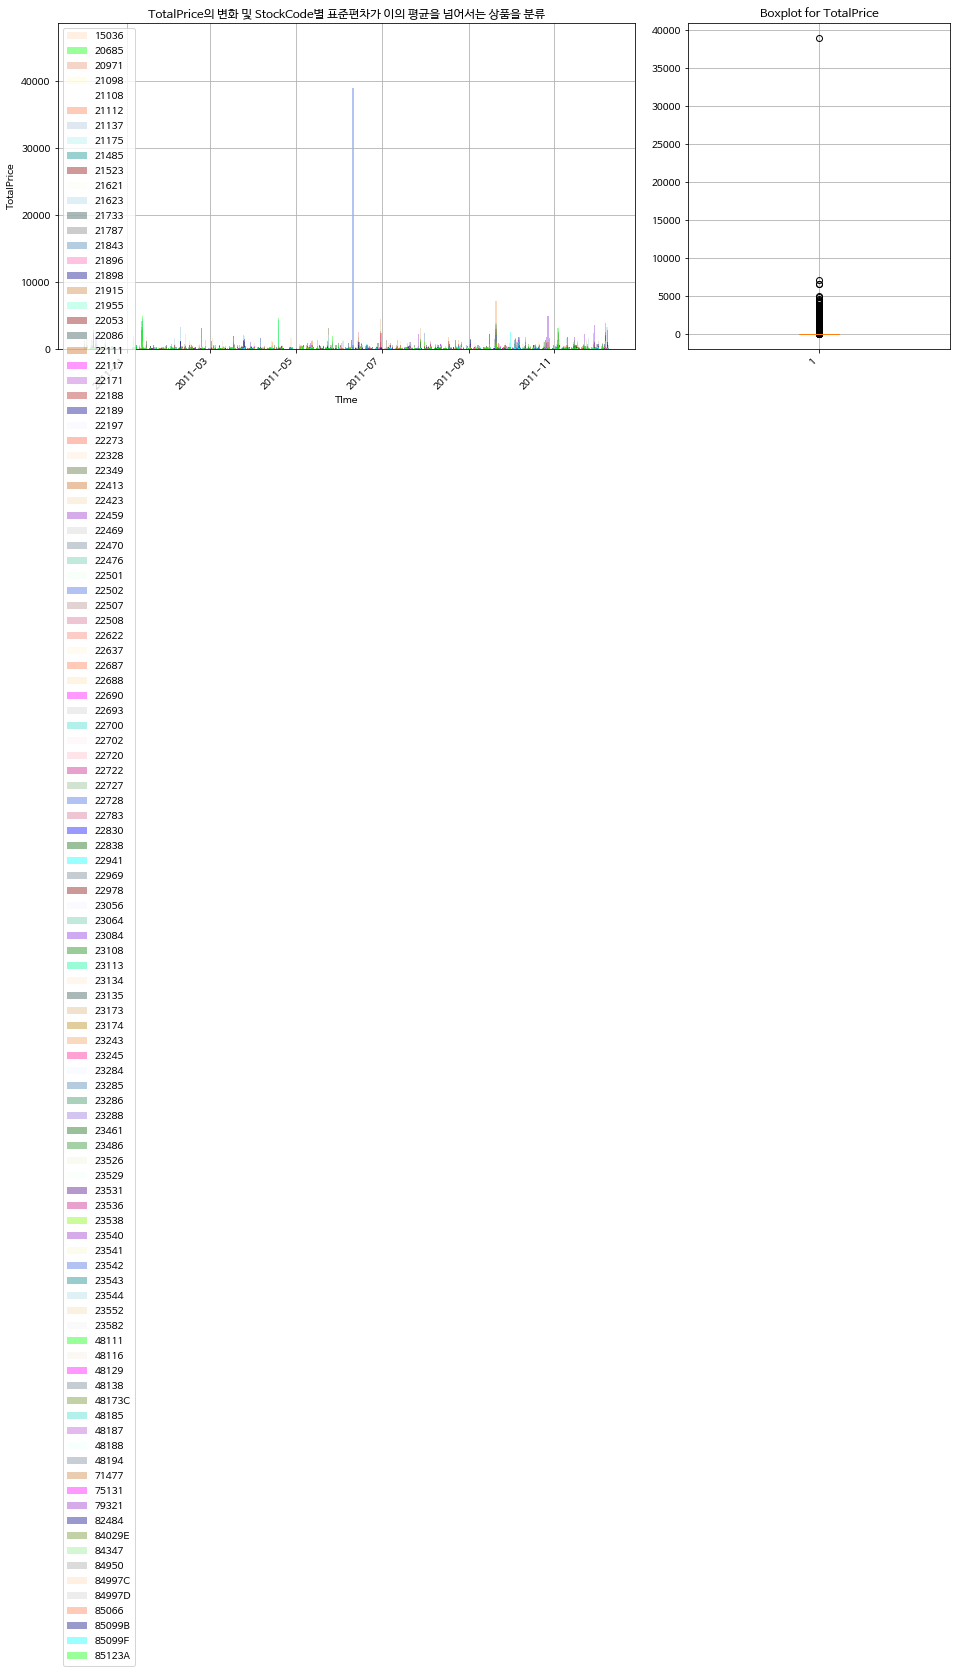

In [ ]:
print('\n')
ts_vis(target_col='TotalPrice')

In [ ]:
indexL = []
over3_dfFv['extr_date'] = over3_dfFv.InvoiceDate.apply(lambda x: x.date())
y = over3_dfFv.groupby('extr_date')['TotalPrice'].max().reset_index().values
with tqdm(total=len(y), file=sys.stdout) as pbar:
    i = 0
    for X in y:
        X1, X2 = X; idx = over3_dfFv[(over3_dfFv['extr_date'] == X1) & (over3_dfFv['TotalPrice'] == X2)].index[0]    
        indexL.append(idx)

        pbar.set_description('progressed: %d' % (1+idx))
        pbar.update(1)     
        i += 1

progressed: 121314: 100%|██████████| 305/305 [00:07<00:00, 41.50it/s]


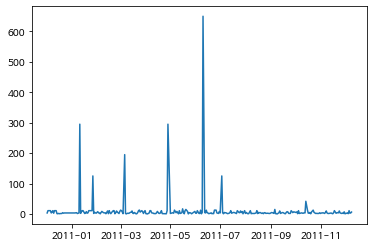

In [ ]:
plt.plot(over3_dfFv.iloc[indexL].iloc[:, 1:]['extr_date'], over3_dfFv.iloc[indexL].iloc[:, 1:]['UnitPrice'])

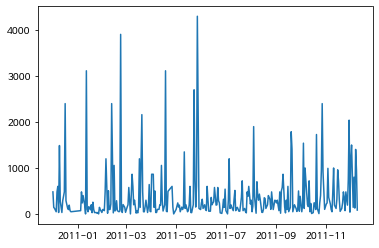

In [ ]:
plt.plot(over3_dfFv.iloc[indexL].iloc[:, 1:]['extr_date'], over3_dfFv.iloc[indexL].iloc[:, 1:]['Quantity'])

In [ ]:
'''
    - 해당 필터는 '계측치'와 '예측치'에 대한 신뢰의 정도를 조절하여 Next state의 예측값을 결정하는 구조입니다.
    하여,  predict function(예측치), update function(계측치)로 나누어 하단에 식을 전개하겠습니다.
    더불어, predict과 update 모두, X, P 즉, 데이터 값, 공분산을 함께 고려합니다.
'''
class kalman_filter():
    # State Update, Covariance Update를 Tuple에 저장합니다. 한 예로, State_t1 = State(X_t1, P_t1)이라면, ((State_t1.X == X_t1) & (State_t1.P == P_t1)) == True가 성립합니다.
    State = namedtuple('State', 'X, P')

    def predict(state, F, Q):
        # F는 해당 시간 t에서의  t-1 상태에 기반한 상태 전이행렬이며, x의 t-1에서의 예측값과 결합됨으로 아래와 같은 '가정 설정문'을 지정합니다.
        assert state.X.shape[0] == F.shape[1]
        assert state.X.shape[1] == 1
        # 전이행렬 'F'와 Process Noise 'Q'값은 대칭행렬이어야 함으로 아래와 같은 '가정 설정문'을 지정합니다.
        assert F.shape[0] == F.shape[1]
        assert Q.shape[0] == Q.shape[1]
        assert Q.shape[0] == F.shape[0]

        x_pred = np.matmul(F, state.X)
        p_pred = np.matmul(F, np.matmul(state.P, F.T)) + Q
        return kalman_filter.State(x_pred, p_pred)

    def update(prior, z, R, H):
        assert prior.X.shape[1] == 1
        assert prior.X.shape[0] == H.shape[1]
        assert H.shape[0] == z.shape[0]
        assert z.shape[1] == 1
        assert prior.P.shape[0] == prior.P.shape[1]
        assert prior.P.shape[1] == H.shape[1]

        z_pred = np.matmul(H, prior.X)
        y = z - z_pred
        # 오차(추정치) 공분산 행렬인 P의 크기가 최소일 때의 K 값을 단계별 K 값으로 결정합니다. 더불어, S의 '역행렬'과 P의 곱을 통해 K(Kalman gain)을 계산합니다. (코드 전개에 대한 수학적 원리를 확인코자 하신다면, 꼭 상단의 첨부문서를 확인해주세요.)
        S = np.matmul(H, np.matmul(prior.P, H.T)) + R
        K = np.matmul(prior.P, np.matmul(H.T, np.linalg.inv(S)))
        x_posterior = prior.X + np.matmul(K, y)
        # P의 Update 값은 P(-)-KHP(-) 값이며, P(-)(1-KH)로 변환할 수 있습니다. (identity를 사용하여 I(단위행렬)을 생성할 수 있습니다.))
        p_posterior = np.matmul((np.identity(prior.P.shape[0]) - np.matmul(K, H)), prior.P)
        return kalman_filter.State(x_posterior, p_posterior)

def main(R_multiplied, target_col):
    global gt, res, vel
    tr_intrim, tr_results = [], []
    for Ti in [0, R_multiplied]:
        data, index = [], 0
        target_col = target_col
        with open(filename) as data_file:
            data_reader = csv.DictReader(data_file, delimiter=',')
            for row in data_reader:
                data.append(np.array([[float(row[target_col])]]))

        gt  = {'price': [], 'trend': []}
        res = {'price': [], 'trend': []}
        vel = []

        x = np.full((2, 1), 2)
        P = np.full((2, 2), 2 ** 2)
        state = kalman_filter.State(x, P)

        Q = np.full((2, 2), 1 ** 2)
        F = np.array([[1, 1],
                    [0, 1]])

        # default value is 0
        multiplied_by_any = Ti 
        R = np.array([[(0.5 + multiplied_by_any) ** 2]]) #
        H = np.array([[1, 0]])        

        counter = 0
        while index < len(data):
            index += 1
            z = data[index - 1]

            if counter == 0:
                x = np.array([[z[0][0]], 
                            [0]])
                state = kalman_filter.State(x, P)
                
            prior = kalman_filter.predict(state, F, Q)
            posterior = kalman_filter.update(prior, z, R, H)
            state = posterior

            gt['price'].append(z[0][0])
            res['price'].append(prior.X[0][0])
            vel.append(prior.X[1][0])

            if counter == 0:
                gt['trend'].append(1)
                res['trend'].append(1)
            else:
                # 현재 시점(state)의 예측값이 이전 시점의 예측 결과값과 비교하여 크면(즉, 증가추세를 보이면) +1, 작으면(동일하거나 감소추세를 보이면) -1로 predicted_trend를 결정합니다.
                predicted_trend = 1 if prior.X[0][0] > res['price'][counter - 1] else -1
                res['trend'].append(predicted_trend)

                gt_trend = 1 if z[0][0] > gt['price'][counter - 1] else -1
                gt['trend'].append(gt_trend)

            counter += 1

        correct_predictions = 0
        for x, y in zip(res['trend'], gt['trend']):
            if x == y:
                correct_predictions += 1
        
        if Ti == 0:
            print(f"\t \033[1m- data length:\033[0m {len(gt['trend'])} \n")

        print_cp  = f'number of correct_predictions: {correct_predictions}'          
        print_acc = f"forcast accuracy: {np.round(np.float(correct_predictions/len(gt['trend'])), 2) * 10**2}%"            
        
        tr_intrim.append([gt, res, vel])
        tr_results.append([print_cp, print_acc])

    print('\n')
    fig = make_subplots(rows=1, cols=2,
                        subplot_titles=(f"<i><b>{tr_results[0][0]}, {tr_results[0][1]}  <br><sup>R=default option</b></i></sup>", f"<i><b>{tr_results[1][0]}, {tr_results[1][1]}</b></i>")
                        )
    
    def to_arr(input_val):
        return np.array(input_val)
    X = pd.to_datetime(df.Date, format='%Y-%m-%d')

    tag = ''
    for i in range(2):
        if i == 1:
            tag = ' - R=default'
        fig.add_trace(go.Scatter(x=X, y=to_arr(tr_intrim[i][0]['price']), name=f'actual price{tag}',
                                 line=dict(color='royalblue', width=3, dash='dot')), 
                      row=1, col=i+1)
        fig.add_trace(go.Scatter(x=X, y=to_arr(tr_intrim[i][1]['price']), name=f'predicted price{tag}',
                                 line=dict(color='red', width=2)),  
                      row=1, col=i+1)
        if i == 1:
            fig.add_trace(go.Scatter(x=X, y=np.log(tr_intrim[i][2])+10, mode='lines', name=f'actual trend(log scale){tag}',
                                    line=dict(color='grey', width=3)), 
                        row=1, col=i+1)

    fig.update_layout(showlegend=False, autosize=False, width=800, height=600, 
                      margin=dict(l=5, r=15, b=10, t=30, pad=4), xaxis_title='date time', yaxis_title='', paper_bgcolor='white' )
    fig.update_annotations(font=dict(family='Arial', size=13, color='grey'))
    fig.layout.annotations[0].update(x=0.20, y=0.99)
    fig.layout.annotations[1].update(x=0.75, y=1.001)
    fig.show(renderer='colab')

In [ ]:
R_multiplied = 10**3 # default value is 0
target_col = 'Adj Close'
if __name__ == '__main__':
    main(R_multiplied, target_col)        

	 - data length: 1259 





In [ ]:
R_multiplied = 10**3 # default value is 0
target_col = 'Adj Close'
if __name__ == '__main__':
    main(R_multiplied, target_col)        

	 - data length: 1259 





In [ ]:
R_multiplied = 10**3 # default value is 0
target_col = 'Adj Close'
if __name__ == '__main__':
    main(R_multiplied, target_col)        

	 - data length: 1259 





<font size = 2></font>

### <font size = 3>Customer Segmentation</font>


	 - R
                     min        std  max  median        mean
Segment_grp                                                 
about_to_sleep        35  10.877256   73    54.0   54.668588
at_Risk               74  68.378886  374   140.0  155.890244
cant_loose            74  66.027784  373   110.0  135.761905
champions              2   3.820839   15     6.0    7.029549
hibernating           74  91.457982  375   221.5  219.353933
loyal_customers       16  15.976348   73    30.0   34.805623
need_attention        35  11.514364   73    54.5   54.047872
new_customers          2   4.061406   15     8.0    8.069767
potential_loyalists    2   9.494930   34    19.0   18.146341
promising             16   5.366947   34    24.5   24.571429



	 - F
                     min        std  max  median       mean
Segment_grp                                                
about_to_sleep         1   0.348741    2     1.0   1.141210
at_Risk                2   0.937036    5     3.0   2.850174
cant_loose  

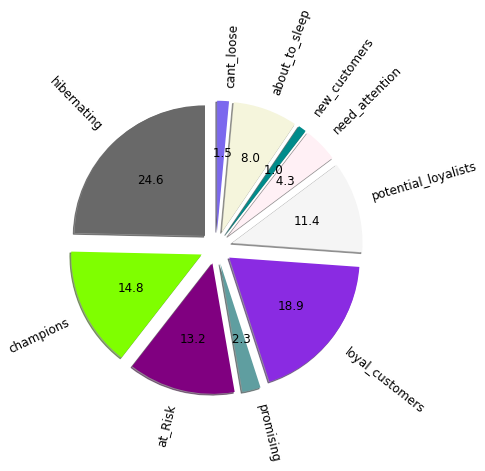

In [ ]:
T_day = max(_df1['InvoiceDate']) + datetime.timedelta(days = 2)
RFM = _df1.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (T_day - x.max()).days,
    'InvoiceNo'  : lambda x: x.nunique(),
    'TotalPrice' : lambda x: x.sum()})

RFM = RFM.reset_index()
RFM.columns = ['ID', 'R', 'F', 'M']

RFM['R_scr'] = pd.qcut(RFM['R'], 5, labels=list(range(1, 6))[::-1])
RFM['F_scr'] = pd.qcut(RFM['F'].rank(method='first'), 5, labels=list(range(1, 6)))
RFM['M_scr'] = pd.qcut(RFM['M'], 5, labels=list(range(1, 6)))

str_typ = lambda colN: RFM[colN].astype(str)
RFM['RF (Segment)'] = str_typ('R_scr') + str_typ('F_scr')
RFM['RFM'] = str_typ('R_scr') + str_typ('F_scr') + str_typ('M_scr')

'''
    seg_map의 두 괄호는 [R][F]의 범위를 의미합니다.
    한 예로, 3[1-2]이라면 R:3, F:1-2 사이의 점수로 구분된 고객층으로 방문빈도('Frequency')는 낮지만, 어능정도 최근까지('Recency') 구매의사를 보인 고객층으로 이해해볼 수 있습니다.
'''
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}
RFM['Segment_grp'] = RFM['RF (Segment)'].replace(seg_map, regex=True)

criteria = ['R', 'F']
RFM_parameters = [RFM.loc[:, ['R', 'F', 'Segment_grp']].groupby('Segment_grp').agg({'min', 'max', 'std', 'mean', 'median'})[x] for x in criteria]
for i, dfi in zip(criteria, RFM_parameters):
    print(f'\n\t {color.BOLD}{color.BLUE}- {i}{color.END}')
    print(dfi)
    print('\n')

random.seed(2023); rfm_grp_colors = random.sample(c_rank, 10)
explodes = [0.25 for x in range(10)]

plt.figure( figsize = (3, 3))
fig = RFM['Segment_grp'].value_counts(sort=False).plot.pie(colors=rfm_grp_colors,
                                                           textprops={'fontsize': 12}, 
                                                           autopct = '%4.1f',
                                                           startangle= 90, 
                                                           radius =2, 
                                                           rotatelabels=True,
                                                           shadow = True,
                                                           explode=explodes); plt.ylabel("")
plt.show(fig)    

### <font size = 3>Customer Clustering Based On RFM Feature</font>

#### <font size = 3>K-means clustering</font>

<font size=2>K-means clustering 구조, 원리를 아래의 링크에 문서로 작성해두었습니다.</font>

<font size=2>Model과 본 문제 간 적합성을 판단코자 하시면 아래의 정리문서가 도움이 될 것입니다.</font>

<font size=2>https://docs.google.com/document/d/1PZOXQi3HALlhEkV_LMLRfrFceDTMZs53dkcp6bgWiI0/edit?usp=sharing</font>

In [ ]:
def distortion_func(growing_num=None):
    global X_scaled
    X = RFM[['R', 'F', 'M']].values

    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)

    J = []
    for n in range(1, growing_num+1):
        '''
            * Option에 대한 첨삭은 scikit-learn의 공식자료 중 "_kmeans.py"를 참조하였습니다. 
            더불어, KMeans()의 선택옵션은 권고되는 default 값을 따르고 있습니다.
            
            - Options:

                1 init='k-means++': 이는, 입력 데이터와 임의로 sampling된 centroid 좌표 간의 euclidean_distances 활용합니다. 
                설정을 'k-means++'가 아닌 'random'으로 설정 시 보유한 데이터 내에서 임의의 점들을 추출하여 평균을 구한 뒤 이를 초기 평균값으로 사용하는 과정을 수행합니다.

                2 n_itnit=10: 해당 알고리즘의 centroid seeds를 변경하여 계산하는 횟수입니다. 이를 연속적으로 시도 후 최적값을 선택하게 됩니다. 
                더불어, clustering algorithm의 궁극적인 목표은 centroid값을 기준으로 cluster에 속하는 타 데이터와의 거리들의 총 합이, cluster에 속하지 않는 데이터들과의 거리의 총 합보다 작도록 하는 것임을 염두하고 사용할 필요가 있습니다.

                3 max_iter=300: iteration에 대한 최대값을 의미하며, EM Algorithm이 최대 300회 반복됨을 의미합니다. 
                (**EM Algorithm에 대한 설명은 상위의 링크(https://docs.google.com/document/d/1PZOXQi3HALlhEkV_LMLRfrFceDTMZs53dkcp6bgWiI0/edit?usp=sharing)의 정리문서를 통해 확인할 수 있습니다.)
        '''
        KM = KMeans(n_clusters=n, init='k-means++', n_init=10, max_iter=300, random_state=0)
        KM.fit(X_scaled)
        J.append(KM.inertia_)
    return J

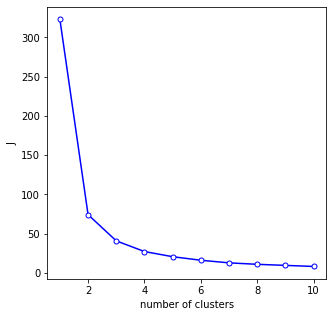

In [ ]:
growing_num = 10
Js = distortion_func(growing_num)

# ,

plt.figure( figsize=(5, 5) )

plt.plot([x for x in range(1, growing_num+1)], Js, color='b', marker='.', linestyle='solid',  mfc='none', mec='b', markersize=10, markerfacecolor='white')
plt.xlabel('number of clusters')
plt.ylabel('J')
plt.show()

In [ ]:
def clustered_res(number_grps=None):
    clsRes = pd.DataFrame( columns=['x-coordinate', 'y-coordinate'] )
    nc = number_grps
    cls = KMeans(n_clusters=nc,init='k-means++', n_init=10, max_iter=1000, random_state=0).fit(X_scaled)
    clsRes.iloc[:, 0] = [x for x in X_scaled]
    clsRes.iloc[:, 1] = cls.labels_
    return clsRes   

def euclidean_distance(p1, p2):
  dt = 0
  for i in range(len(p1)):
    dt += (p1[i] - p2[i]) ** 2
  return dt ** 0.5

def get_sum_distance(target_x, target_cluster):
    res = np.sum([euclidean_distance(target_x, x) for x in target_cluster])
    return res    

def calculate_silhouette_coef(min_cluster_nm, max_cluster_nm):
    '''
        - clsRes: clustering result
        - indL: '좌표', '라벨(decided by the data recognition model)'정보를 담고있는 DataFrame 'clsRes'의 index정보를 담고있습니다.
        - target_ind: Silhouette Coefficient를 구하고자하는 좌표정표를 clustering result에 대한 DataFrame 'clsRes'의 index를 지정하여 저장합니다.
    '''
    idx = 0
    with tqdm(total=max_cluster_nm+1 - min_cluster_nm, file=sys.stdout) as pbar:
        silhouette_coefficient_save = []
        for gi in range(min_cluster_nm, max_cluster_nm+1):
            number_grps = gi
            clsRes = clustered_res(number_grps) 
            unq_labels = clsRes['y-coordinate'].unique()
            dt_len = len(clsRes)

            silhouette_width = []
            for row in range(dt_len):

                indL = list(clsRes.index)

                target_ind = row
                indL.remove(target_ind)

                initial_x = clsRes.loc[target_ind, 'x-coordinate']
                initial_y = clsRes.loc[target_ind, 'y-coordinate']

                if sum(clsRes['y-coordinate'] == initial_y) == 1:
                    si = int(0)
                else:
                    bi = []
                    comparison_target = clsRes.iloc[indL].reset_index(drop=True)
                    for i in range(number_grps): 
                        y = comparison_target.loc[comparison_target['y-coordinate'] == i, 'x-coordinate'] 
                        y = np.array([x for x in y])
                        if i == initial_y:
                            ai = y
                        else:
                            if number_grps > 2:
                                bi.append(y)
                            else:
                                biFN = y

                    _aiFN = get_sum_distance(initial_x, ai)/len(ai)

                    try:
                        _biFN = get_sum_distance(initial_x, biFN)
                        _biFN = _biFN/len(biFN)
                    except NameError:
                        distance_dic = {}
                        for x in enumerate(bi):
                            distance_dic[x[0]] = get_sum_distance(initial_x, x[1])
                        j = min(distance_dic, key=distance_dic.get)
                        _biFN = distance_dic[j]/len(bi[j])

                    si = (_biFN - _aiFN)/max(_biFN, _aiFN)
                    silhouette_width.append(si)

            overall_avg_silhouette_width = []
            for ul in unq_labels:
                temp = np.mean([s for s, l in zip(silhouette_width, list(clsRes['y-coordinate'])) if l == ul])
                overall_avg_silhouette_width.append(temp)

            silhouette_coef = max(overall_avg_silhouette_width)
            silhouette_coefficient_save.append(silhouette_coef)

            pbar.set_description('progressed: %d' % (1+idx))
            pbar.update(1)
            time.sleep(0.05)        
            idx += 1
            
    return silhouette_coefficient_save

In [ ]:
min_cluster_nm, max_cluster_nm = 2, 10
silhouette_res_2to10 = calculate_silhouette_coef(min_cluster_nm, max_cluster_nm)

progressed: 9: 100%|██████████| 9/9 [08:58<00:00, 59.78s/it]


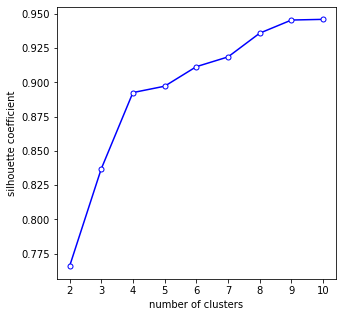

In [ ]:
''' 
with open('silhouette_res_2to10.txt', 'wb') as fp:
    pickle.dump(silhouette_res_2to10, fp)
with open('silhouette_res_2to10.txt', 'rb') as fp_:
    silhouette_res_2to10 = pickle.load(fp_)    
'''

growing_num = 10

# ,

plt.figure( figsize=(5, 5) )

plt.plot([x for x in range(2, growing_num+1)], silhouette_res_2to10, color='b', marker='.', linestyle='solid',  mfc='none', mec='b', markersize=10, markerfacecolor='white')
plt.xlabel('number of clusters')
plt.ylabel('silhouette coefficient')
plt.show()

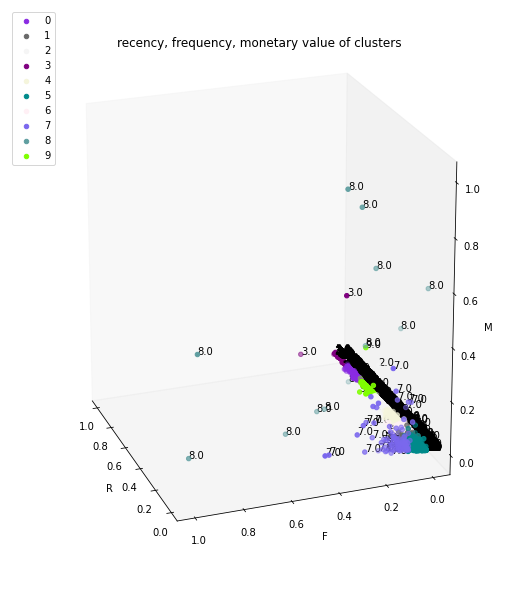

In [ ]:
KM = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=10**3, random_state=0)
KM.fit(X_scaled)
LB = KM.labels_

RFM_ = pd.DataFrame(X_scaled, columns = ['R', 'F', 'M'])
RFM_['LB'] = LB

# ,

def vis_3d_RFM_clusters(input_df, label_rng, target_col, grp_title, leg, txt_num,seed_num, anot):
    fig = plt.figure( figsize=(7, 8) ); axes = Axes3D(fig, elev=20,azim=160)
    random.seed(seed_num); cluster_colors = random.sample(c_rank, len(label_rng))

    for i, c in zip(label_rng, cluster_colors):
        axes.scatter(
            input_df[['R']][input_df[target_col] == i],
            input_df[['F']][input_df[target_col] == i],
            input_df[['M']][input_df[target_col] == i], color=c        
        )

    axes.grid(False)
    axes.set_xlabel('R')
    axes.set_ylabel('F')
    axes.set_zlabel('M')

    axes.legend(leg, loc=2)
    axes.set_facecolor("w")

    if anot == 1:
        for j in input_df.values:
            axes.text(j[0], j[1], j[2], str(j[3]))
    else:
        pass

    plt.title(grp_title)
    
    return plt.show()

vis_3d_RFM_clusters(RFM_, range(10), 'LB', 'recency, frequency, monetary value of clusters', set(LB), 3, 2030, 1)

In [ ]:
RFM_['Segment_grp'] = RFM['Segment_grp']
RFM_sorted_ByLB = RFM_.sort_values('LB').reset_index(drop=True)

merge_countInfo, dfLen = [], []
for i in range(10):
    y = pd.DataFrame(RFM_sorted_ByLB[RFM_sorted_ByLB['LB'] == i]['Segment_grp'].value_counts())
    merge_countInfo.append(y)
    dfLen.append(len(y))    

RFM_grp_cnt = pd.concat(merge_countInfo).reset_index()
RFM_grp_cnt = RFM_grp_cnt.rename(columns={'index':'Segment_grp'}) 
RFM_grp_cnt['LB'] = sum([[str(x)]*y for x, y in zip(range(10), dfLen)], [])
RFM_grp_cnt['Cluster_LB'] = 'Cluster_' + (RFM_grp_cnt['LB'])


RFM_grp_cnt.set_index(['Cluster_LB', 'LB'])

Segment_grp  Segment_grp
Cluster_LB LB                                  
Cluster_0  0           hibernating          242
           0               at_Risk           40
           0            cant_loose            4
Cluster_1  1       loyal_customers          373
           1        about_to_sleep          190
           1   potential_loyalists          133
           1        need_attention           97
           1             promising           48
Cluster_2  2           hibernating          171
           2               at_Risk          148
           2            cant_loose           12
Cluster_3  3           hibernating          165
           3               at_Risk           12
           3            cant_loose            1
Cluster_4  4               at_Risk          172
           4           hibernating          154
           4            cant_loose           19
Cluster_5  5             champions          513
           5   potential_loyalists          358
           5       loyal_customers          306
           5             promising           50
           5         new_customers           43
Cluster_6  6        about_to_sleep          157
           6           hibernating          139
           6               at_Risk          128
           6       loyal_customers          119
           6        need_attention           91
           6            cant_loose           23
Cluster_7  7             champions          121
           7       loyal_customers           18
Cluster_8  8             champions            9
           8       loyal_customers            2
           8   potential_loyalists            1
Cluster_9  9           hibernating          197
           9               at_Risk           74
           9            cant_loose            4

<font size = 2>상위는 R, F, M 값들간의 유사성을 기반으로 진행한 'K-means clustering'과 전통 RFM 분석의Customer Segmentation에 대한 결과값 간의 비교표입니다.</font>

<font size = 2>시각화 결과<'recency, frequency, monetary value of clusters'>를 참조하여 분석한 특이사항은 아래와 같습니다.</font>

<font size = 2>1. 상위의 그래프 및 표의 결과에서 7, 5번 Cluster에 속한 값들을 주목해주십시오. 상대적으로 고객 세분화 결과의 상위계열에 속하며, 이들의 R, F, M 값의 분포가 유사하게 책정된 것을 유추해볼 수 있습니다.</font>

<font size = 2>2. 상위의 그래프 및 표의 결과에서 8, 3번 Cluster에 속한 값들을 주목해주십시오. 8번 Cluster의 상위계열의 고객층의 경우, R, F에 비해 M(Monetary)의 값이 현저히 작은 Champions고객층을 따로 구분해 냄을 확인 할 수 있습니다. 더분어, 이에 상반되는(M(Monetary)의 값이 현저히 큰) Loyal Customers, Potential Loyalists를 따로 구분해냄을 확인할 수 있습니다.</font>

> <font size = 2>***Champions Group의 경우 R: [5], F: [4-5] 사이의 그룹***</font>

> <font size = 2>***Potential Loyalists의 경우 R: [4-5], F: [2-3] 사이의 그룹***</font>

> <font size = 2>***Loyal Customers의 경우 R: [3-4], F: [4-5] 사이의 그룹***</font>





---

<font size = 2><font color = 'blue'>***위와 같은 분석에 따라 두 가지 분석을 추가적으로 진행할 것입니다.***</font>

> <font size = 2><font color = 'gray'>1. </font>

## <font size = 2>TESTING</font>

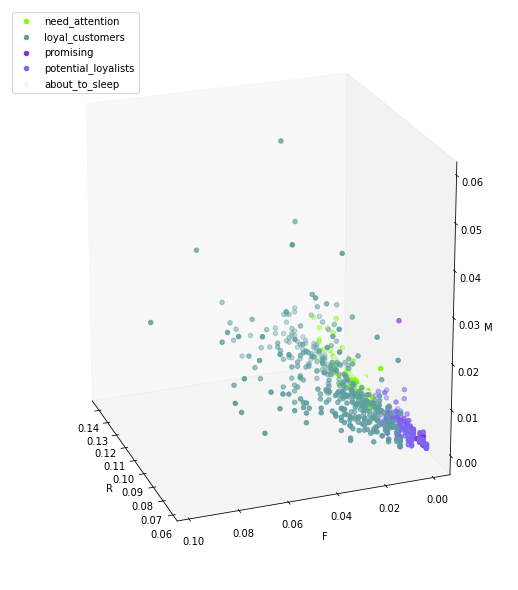

In [ ]:
RFM_1 = RFM_[RFM_['LB'] == 1].reset_index(drop=True)
vis_3d_RFM_clusters(RFM_1, set(RFM_1['Segment_grp']), 'Segment_grp', '', set(RFM_1['Segment_grp']), 4, 2024, 0)

In [ ]:
error_ind = []
for i in range(4334):
    if silhouette_width[i] != silhouette_val_list[i]:
        error_ind.append(i)

In [ ]:
number_grps = 4
clsRes = clustered_res(number_grps) 
unq_labels = clsRes['y-coordinate'].unique()
dt_len = len(clsRes)

row = error_ind[3]

# ,

indL = list(clsRes.index)

target_ind = row
indL.remove(target_ind)

initial_x = clsRes.loc[target_ind, 'x-coordinate']
initial_y = clsRes.loc[target_ind, 'y-coordinate']

if sum(clsRes['y-coordinate'] == initial_y) == 1:
    si = int(0)
else:
    bi = []
    comparison_target = clsRes.iloc[indL].reset_index(drop=True)
    for i in range(number_grps): 
        y = comparison_target.loc[comparison_target['y-coordinate'] == i, 'x-coordinate'] 
        if i == initial_y:
            ai = list(y)
        else:
            if number_grps > 2:
                bi.append(list(y))
            else:
                biFN = list(y)

    _aiFN = get_sum_distance(initial_x, ai)/len(ai)

    try:
        _biFN = get_sum_distance(initial_x, biFN)
        _biFN = _biFN/len(biFN)
    except NameError:
        distance_dic = {}
        for x in enumerate(bi):
            distance_dic[x[0]] = get_sum_distance(initial_x, x[1])
        j = min(distance_dic, key=distance_dic.get)
        _biFN = distance_dic[j]/len(bi[j])

    si = (_biFN - _aiFN)/max(_biFN, _aiFN)

In [ ]:
X, labels = np.array([list(x) for x in clsRes['x-coordinate']]), np.array(list(clsRes['y-coordinate']))
uniq_labels = np.unique(labels)
silhouette_val_list = []

i = error_ind[3]

# ,

target_data = X[i]

## calculate a(i)
target_label = labels[i]
target_cluster_data_idx = np.where(labels==target_label)[0]
if len(target_cluster_data_idx) == 1:
    silhouette_val_list.append(0)
else:
    target_cluster_data = X[target_cluster_data_idx]
    temp1 = get_sum_distance(target_data, target_cluster_data)
    a_i = temp1/(target_cluster_data.shape[0]-1)

## calculate b(i)
b_i_list = []

positionT, distanceT = [], [] 
label_list = uniq_labels[np.unique(labels) != target_label]
for ll in label_list:
    other_cluster_data_idx = np.where(labels==ll)[0]

    other_cluster_data = X[other_cluster_data_idx]
    positionT.append(other_cluster_data)

    temp2 = get_sum_distance(target_data, other_cluster_data)
    distanceT.append(temp2)

    temp_b_i = temp2/other_cluster_data.shape[0]
    b_i_list.append(temp_b_i)

b_i = min(b_i_list)
s_i = (b_i-a_i)/max(a_i, b_i)
silhouette_val_list.append(s_i)

In [ ]:
print(si)
print(s_i)

0.7907083236108075
0.32928584246998144


In [ ]:
print(distanceT)
print(distance_dic)

[242.57339571240934, 220.56162957786535, 336.74800803807034]
{0: 242.57339571240934, 1: 220.56162957786535, 2: 336.74800803807034}


In [ ]:
print(a_i)
print(_aiFN)

0.0754276359501365
0.0754276359501365


In [ ]:
other_cluster_data.shape[0]

500

In [ ]:
len(bi[j])

612

In [ ]:
clsRes.iloc[12, :]

x-coordinate    [0.15281501340482573, 0.014634146341463414, 0....
y-coordinate                                                    2
Name: 12, dtype: object

In [ ]:
uniq_labels

array([0, 1, 2, 3])

In [ ]:
sum(clsRes['y-coordinate'] == 1)
# 1

612

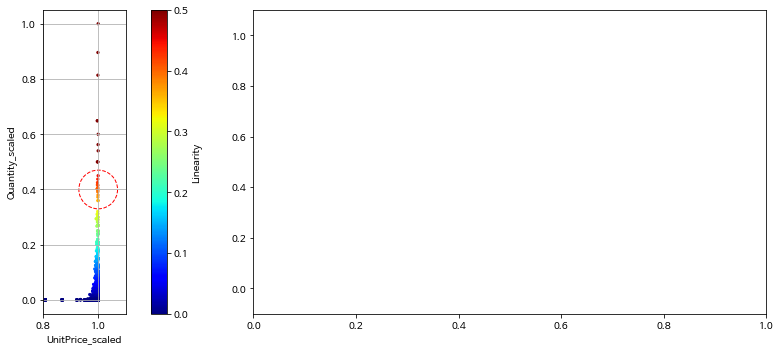

In [ ]:
price_quant = over3_dfFv.loc[:, ['UnitPrice', 'Quantity']].values.tolist()
scaler = MinMaxScaler()
scaler.fit(price_quant)
price_quant_new = scaler.transform(price_quant); a, b = zip(*price_quant_new); a = pd.Series(a)

price_quant_newDF = pd.DataFrame( columns=['UnitPrice_scaled', 'Quantity_scaled'] )
a[a > 0] = 1 - a; price_quant_newDF.iloc[:, 0] = a
price_quant_newDF.iloc[:, 1] = b; price_quant_newDF = price_quant_newDF[price_quant_newDF.UnitPrice_scaled > 0].reset_index(drop=True).copy()

'''
* Solution one
'''
comparison  = (price_quant_newDF.iloc[:, 0] >= price_quant_newDF.iloc[:, 1])
rise1_run0 = np.where(comparison == True )[0]
rise0_run1 = np.where(comparison == False)[0]
price_quant_newDF.loc[rise1_run0, 'Linearity'] = price_quant_newDF.iloc[rise1_run0, 1]/price_quant_newDF.iloc[rise1_run0, 0]
price_quant_newDF.loc[rise0_run1, 'Linearity'] = price_quant_newDF.iloc[rise0_run1, 0]/price_quant_newDF.iloc[rise0_run1, 1]

'''
* Solution two
> price_quant_newDF.loc[:, 'Linearity'] = price_quant_newDF.iloc[:, 1]/price_quant_newDF.iloc[:, 0]
'''

fig, axes = plt.subplots(1, 2, figsize=(15, 5))
price_quant_newDF.plot(kind='scatter', x='UnitPrice_scaled', y='Quantity_scaled',
                       c='Linearity', ax=axes[0], cmap='jet', vmin=0, vmax=0.5, s=5)

c = plt.Circle((1, 0.4), 0.07, fill=False, color='r', ls='--')
axes[0].set_aspect(1)
axes[0].add_artist(c)

axes[0].set_xlim(0.8,1.1); plt.ylim(-0.1,1.1)
axes[0].grid(True)
plt.tight_layout()